# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.5f}'.format
# pd.reset_option('display.float_format')

# fold path

In [12]:
drive = 'D'

In [13]:
ods_fold = f'{drive}:/data/big2/ODS'
big2_fold = f'{drive}:/data/big2'
analysis_fold = f'{drive}:/data/big2/BD3/an'
raw_fold = f'{drive}:/data/big2/BD3/raw'
df_fold = f'{drive}:/data/big2/BD3/df'

# Load(❌)

## 등록&제원정보(4등급) result (1일평균주행거리 추가)

In [5]:
# about 17.7s
name = '4등급_차량_리스트_양식_result(전체)_Grade_추가_1일평균주행거리_추가(2023.04.19_PM.02.25.59)'
file_name = f'{name}.csv'
g4 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False)
g4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 40 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1502235 non-null  object 
 1   차량번호        1502235 non-null  object 
 2   제원관리번호      1502235 non-null  object 
 3   차종          1502235 non-null  object 
 4   용도          1502235 non-null  object 
 5   최초등록일       1502235 non-null  int64  
 6   연식          1502235 non-null  int64  
 7   제작일자        1335178 non-null  float64
 8   검사유효일       1502223 non-null  float64
 9   배출가스인증번호    1384783 non-null  object 
 10  등급          1502235 non-null  int64  
 11  차명          1502235 non-null  object 
 12  차종분류        1502235 non-null  object 
 13  차종유형        1502235 non-null  object 
 14  자동차형식       1501958 non-null  object 
 15  제작사명        1492590 non-null  object 
 16  연료          1502235 non-null  object 
 17  엔진형식        1500400 non-null  object 
 18  총중량         1502234 no

In [6]:
g4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '차령', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [7]:
g4 = g4.drop(['일치유무', '인증번호 수정 유무', '배출가스', '등급2', 'DPF', '비고', '차령'], axis=1)
g4.shape

(1502235, 33)

### 등급 수정
- 5등급으로 수정
    - 배인번호_수정 : 4MY-DB-04, 24개
    - 배인번호_수정 : 4MY-DB-03, 9개

In [8]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04'].shape

(24, 33)

In [9]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([4.])

In [10]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [11]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [12]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03'].shape

(9, 33)

In [13]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([4.])

In [14]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [15]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [16]:
g4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

### 코란KJ 연료 휘발유로 수정
- 차량번호 : 31고7134
- 연식 : 1996
- 연료 : 휘발유

In [1455]:
g4.loc[g4['차량번호'] == '31고7134', '연료']

1502231    경유
Name: 연료, dtype: object

In [1456]:
g4.loc[g4['차량번호'] == '31고7134', '연료'] = '휘발유'

## 등록&제원정보(5등급)

In [17]:
# about 37.6s
name = '[ODS][G5]등록정보&제원정보(2022.12.28)'
file_name = f'{name}.csv'
g5 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
g5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378648 entries, 0 to 2378647
Data columns (total 49 columns):
 #   Column        Dtype  
---  ------        -----  
 0   차량관리번호        object 
 1   차량등록번호        object 
 2   본거지법정동코드      int64  
 3   소유자구분         object 
 4   차종_등록정보       object 
 5   용도            object 
 6   현재회원번호        object 
 7   차대번호          object 
 8   최초등록일자        int64  
 9   차량연식          int64  
 10  차량제작일자        float64
 11  배출가스검사유효일자    float64
 12  제원관리번호        object 
 13  배출가스인증번호      object 
 14  배출가스등급        object 
 15  저공해조치YN(미사용)  object 
 16  저공해조치종류       float64
 17  저공해조치구조변경YN   object 
 18  차량등록번호숫자정보    int64  
 19  차량말소YN        object 
 20  최초회원번호        object 
 21  취득일자          float64
 22  취득금액          float64
 23  생성일시_등록정보     object 
 24  수정일시_등록정보     object 
 25  차명            object 
 26  차종_제원정보       object 
 27  차종분류          object 
 28  차종유형(소분류)     object 
 29  자동차형식         object 
 30  제작사명          obje

### 코란KJ 연료 휘발유로 수정
- 차량번호 : 31고7134
- 연식 : 1996
- 연료 : 휘발유

In [1458]:
g5.loc[g5['차량등록번호'] == '31고7134', '연료']

Series([], Name: 연료, dtype: object)

## 정기, 정밀검사

In [18]:
# about 7m 35.4s
name = '[ODS]정기&정밀검사(2022.12.28)'
file_name = f'{name}.csv'
ins = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀'])
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50688654 entries, 0 to 50688653
Data columns (total 13 columns):
 #   Column     Dtype  
---  ------     -----  
 0   주행거리       object 
 1   차대번호       object 
 2   검사방법       object 
 3   검사일자       int64  
 4   검사종류       object 
 5   검사판정       object 
 6   무부하매연판정1   object 
 7   무부하매연판정2   object 
 8   무부하매연판정3   object 
 9   무부하매연측정치1  float64
 10  무부하매연측정치2  float64
 11  무부하매연측정치3  float64
 12  정기정밀       object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.9+ GB


In [2021]:
ins['검사일자'].describe()

count   50688654.00000
mean    20205442.96229
std        11147.21167
min     20190102.00000
25%     20191227.00000
50%     20201219.00000
75%     20211213.00000
max     20230107.00000
Name: 검사일자, dtype: float64

In [1574]:
# 8.4s
chk['최근검사일자수정'] = chk['최근검사일자'].str.split(' ').str[0]
chk['최근검사일자수정'] = pd.to_datetime(chk['최근검사일자수정'])
chk['최근검사일자수정'].head()

0   2022-12-31
1   2022-12-31
2   2022-12-31
3   2022-12-31
4   2022-12-31
Name: 최근검사일자수정, dtype: datetime64[ns]

In [1575]:
chk['등록일기준검사일'] = chk['최근검사일자수정'] - chk['최초등록일자수정']
chk['등록일기준검사일'].head()

0   8767 days
1   4405 days
2   4180 days
3   6140 days
4   5857 days
Name: 등록일기준검사일, dtype: timedelta64[ns]

In [1576]:
# 26.1s
chk['등록일기준검사일'] = chk['등록일기준검사일'].astype('str')
chk['등록일기준검사일'].head()

0    8767 days
1    4405 days
2    4180 days
3    6140 days
4    5857 days
Name: 등록일기준검사일, dtype: object

In [1577]:
# 6.1s
chk['등록일기준검사일'] = chk['등록일기준검사일'].str.split(' ').str[0]
chk['등록일기준검사일'].head()

0    8767
1    4405
2    4180
3    6140
4    5857
Name: 등록일기준검사일, dtype: object

In [1578]:
chk['등록일기준검사일'] = chk['등록일기준검사일'].astype('int')
chk['등록일기준검사일'].head()

0    8767
1    4405
2    4180
3    6140
4    5857
Name: 등록일기준검사일, dtype: int32

In [1579]:
chk['일일평균주행거리'] = chk['최근주행거리'] / chk['등록일기준검사일']
chk['일일평균주행거리'].head()

0   22.86244
1   22.40590
2   18.06220
3   35.94349
4   22.48574
Name: 일일평균주행거리, dtype: float64

In [1580]:
chk['일일평균주행거리'].describe()

count   2009566.00000
mean         41.55247
std          77.91782
min           0.00000
25%          25.73761
50%          36.66749
75%          50.19146
max      102073.36301
Name: 일일평균주행거리, dtype: float64

In [1581]:
chk['일일평균주행거리'].isnull().sum()

0

In [1582]:
chk.head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리,최초등록일자_년,최초등록일자_월,최초등록일자_일,최초등록일자수정,최근검사일자수정,등록일기준검사일,일일평균주행거리
0,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324,1998,12,30,1998-12-30,2022-12-31,8767,22.86244
1,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870,2010,12,09,2010-12-09,2022-12-31,4405,22.40590
2,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000,2011,07,22,2011-07-22,2022-12-31,4180,18.06220
3,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000,2006,03,10,2006-03-10,2022-12-31,6140,35.94349
4,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924,2006,12,18,2006-12-18,2022-12-31,5857,22.48574


In [1583]:
today_date = datetime.today().strftime("%Y-%m-%d")
today_date

'2023-06-16'

In [1584]:
chk['현재일자'] = today_date
chk['현재일자'] = pd.to_datetime(chk['현재일자'])
chk['현재일자'].head()

0   2023-06-16
1   2023-06-16
2   2023-06-16
3   2023-06-16
4   2023-06-16
Name: 현재일자, dtype: datetime64[ns]

In [1585]:
chk['최근검사경과일'] = chk['현재일자'] - chk['최근검사일자수정']
chk['최근검사경과일'].head()

0   167 days
1   167 days
2   167 days
3   167 days
4   167 days
Name: 최근검사경과일, dtype: timedelta64[ns]

In [1586]:
# 33.6s
chk['최근검사경과일'] = chk['최근검사경과일'].astype('str')
chk['최근검사경과일'] = chk['최근검사경과일'].str.split(' ').str[0]
chk['최근검사경과일'].head()

0    167
1    167
2    167
3    167
4    167
Name: 최근검사경과일, dtype: object

In [1587]:
chk['최근검사경과일'] = chk['최근검사경과일'].astype('int')
chk['최근검사경과일'].head()

0    167
1    167
2    167
3    167
4    167
Name: 최근검사경과일, dtype: int32

In [1588]:
chk['최근검사경과일'].isnull().sum()

0

In [1589]:
chk['최근검사경과일'].describe()

count   2009566.00000
mean        669.50837
std         773.44140
min         167.00000
25%         338.00000
50%         475.00000
75%         689.00000
max        7676.00000
Name: 최근검사경과일, dtype: float64

In [1590]:
chk.head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리,최초등록일자_년,최초등록일자_월,최초등록일자_일,최초등록일자수정,최근검사일자수정,등록일기준검사일,일일평균주행거리,현재일자,최근검사경과일
0,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324,1998,12,30,1998-12-30,2022-12-31,8767,22.86244,2023-06-16,167
1,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870,2010,12,09,2010-12-09,2022-12-31,4405,22.40590,2023-06-16,167
2,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000,2011,07,22,2011-07-22,2022-12-31,4180,18.06220,2023-06-16,167
3,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000,2006,03,10,2006-03-10,2022-12-31,6140,35.94349,2023-06-16,167
4,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924,2006,12,18,2006-12-18,2022-12-31,5857,22.48574,2023-06-16,167


In [1591]:
chk[['일일평균주행거리', '최근검사경과일']].isnull().sum()

일일평균주행거리    0
최근검사경과일     0
dtype: int64

In [1592]:
chk[['일일평균주행거리', '최근검사경과일']].describe()

,일일평균주행거리,최근검사경과일
count,2009566.00000,2009566.00000
mean,41.55247,669.50837
std,77.91782,773.44140
min,0.00000,167.00000
25%,25.73761,338.00000
50%,36.66749,475.00000
75%,50.19146,689.00000
max,102073.36301,7676.00000


In [1593]:
chk[chk['일일평균주행거리'] > 2640].shape

(5, 17)

In [1594]:
chk[chk['최근검사경과일'] > 760].shape

(413097, 17)

In [1595]:
chkm = chk[['차대번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일']]
chkm.shape

(2009566, 8)

In [1596]:
# 
chkm.to_csv(os.path.join(raw_fold, '일일평균주행거리_최초등록일자_최근검사일자_기준.csv'), index=False)

## 차명_연료_매칭

In [1468]:
# about 0.6s
name = '차명_연료_매칭_2023.03.03_AM.11.12.03'
file_name = f'{name}.xlsx'
fuel = pd.read_excel(os.path.join(big2_fold, file_name))
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   차명      216 non-null    object
 1   연료      216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


## 법정동 코드

In [1469]:
# about 5.6s
name = '법정동코드_2022.10.14(수정2023.05.04)'
file_name = f'{name}.xlsx'
code = pd.read_excel(os.path.join(big2_fold, file_name), usecols=['법정동코드', '시도', '시구군'])
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46342 entries, 0 to 46341
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동코드   46342 non-null  int64 
 1   시도      46342 non-null  object
 2   시구군     46319 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [1470]:
code.head()

,법정동코드,시도,시구군
0,1100000000,서울특별시,NaN
1,1111000000,서울특별시,종로구
2,1111010100,서울특별시,종로구
3,1111010200,서울특별시,종로구
4,1111010300,서울특별시,종로구


In [1471]:
code = code.rename(columns={'법정동코드':'본거지법정동코드'})
code.head()

,본거지법정동코드,시도,시구군
0,1100000000,서울특별시,NaN
1,1111000000,서울특별시,종로구
2,1111010100,서울특별시,종로구
3,1111010200,서울특별시,종로구
4,1111010300,서울특별시,종로구


## 운행제한 건수 데이터

In [1472]:
# 0.8s
name = '차대번호별_적발(2023.06.13)'
file_name = f'{name}.csv'
lcnt = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
lcnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731507 entries, 0 to 731506
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   VIN     731507 non-null  object 
 1   계절제_1차  37861 non-null   float64
 2   계절제_2차  54788 non-null   float64
 3   계절제_3차  68278 non-null   float64
 4   비상시     94084 non-null   float64
 5   상시      84185 non-null   float64
 6   계절제_4차  29307 non-null   float64
dtypes: float64(6), object(1)
memory usage: 39.1+ MB


In [1473]:
len(lcnt['VIN'].unique())

731507

In [1474]:
lcnt = lcnt.rename(columns={'VIN':'차대번호'})
lcnt.head()

,차대번호,계절제_1차,계절제_2차,계절제_3차,비상시,상시,계절제_4차
0,KPBFA2AD14P100772,1.00000,NaN,NaN,1.00000,NaN,NaN
1,KMJWWH7JP5U656738,4.00000,2.00000,25.00000,3.00000,NaN,1.00000
2,KNAJC52136A532787,2.00000,NaN,NaN,1.00000,NaN,NaN
3,KMHSH81WP6U081899,4.00000,NaN,NaN,1.00000,NaN,NaN
4,KNAJE55186K143510,1.00000,NaN,NaN,1.00000,NaN,NaN


In [1475]:
lcnt.columns

Index(['차대번호', '계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차'], dtype='object')

In [1476]:
lcnt['운행제한건수'] = lcnt[['계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차']].sum(axis=1)
lcnt.head()

,차대번호,계절제_1차,계절제_2차,계절제_3차,비상시,상시,계절제_4차,운행제한건수
0,KPBFA2AD14P100772,1.00000,NaN,NaN,1.00000,NaN,NaN,2.00000
1,KMJWWH7JP5U656738,4.00000,2.00000,25.00000,3.00000,NaN,1.00000,35.00000
2,KNAJC52136A532787,2.00000,NaN,NaN,1.00000,NaN,NaN,3.00000
3,KMHSH81WP6U081899,4.00000,NaN,NaN,1.00000,NaN,NaN,5.00000
4,KNAJE55186K143510,1.00000,NaN,NaN,1.00000,NaN,NaN,2.00000


# 전처리(❌)

## 검사 정보 필요 데이터만 추출(insm)

In [1477]:
ins.columns

Index(['주행거리', '차대번호', '검사방법', '검사일자', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀'],
      dtype='object')

In [1478]:
ins.shape

(50688654, 13)

In [1479]:
insm = ins[['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀']]
insm.shape

(50688654, 13)

In [1480]:
insm['검사일자'].describe()

count   50688654.00000
mean    20205442.96229
std        11147.21167
min     20190102.00000
25%     20191227.00000
50%     20201219.00000
75%     20211213.00000
max     20230107.00000
Name: 검사일자, dtype: float64

In [1481]:
# about 36.5s
insm = insm.sort_values('검사일자', ascending=False).reset_index(drop=True)
insm = insm.drop_duplicates(['차대번호']).reset_index(drop=True)
insm.shape

(22044208, 13)

In [1482]:
insm.head()

,차대번호,주행거리,검사일자,검사방법,검사종류,검사판정,무부하매연판정1,무부하매연판정2,무부하매연판정3,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,정기정밀
0,KNABZ511BDT493285,35520.0,20230107,부하검사(ASM-Idling),종합검사,Y,Y,Y,Y,0.00000,0.00000,30.00000,정밀
1,KLYDC487DHC234659,42558.0,20230107,부하검사(ASM-Idling),종합검사,Y,Y,Y,Y,0.00000,7.00000,0.00000,정밀
2,KMJWA37KBCU481873,278303.0,20230107,부하검사(KD-147),종합검사,Y,Y,NaN,NaN,0.00000,NaN,NaN,정밀
3,KMHNU81WP9U093815,391760.0,20230107,부하검사(KD-147),종합검사,Y,Y,NaN,NaN,7.00000,NaN,NaN,정밀
4,KMFWBX7KBKU059677,32356.0,20230107,부하검사(KD-147),종합검사,Y,Y,Y,NaN,0.00000,379.00000,NaN,정밀


## 말소 차량 제거(gm)

In [1483]:
g4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [1484]:
g4['말소여부'].value_counts(dropna=False)

말소여부
N    1502235
Name: count, dtype: int64

In [1613]:
gm4 = g4.loc[g4['말소여부'] == 'N'].reset_index(drop=True)
gm4.shape

(1502235, 33)

In [1614]:
g5['차량말소YN'].value_counts(dropna=False)

차량말소YN
Y    1223886
N    1154762
Name: count, dtype: int64

In [1615]:
gm5 = g5.loc[g5['차량말소YN'] == 'N'].reset_index(drop=True)
gm5.shape

(1154762, 49)

## [❌] result 4등급만 추출

In [1616]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

In [1617]:
# gm4 = gm4.loc[gm4['등급_수정'] == 4].reset_index(drop=True)
# gm4.shape

In [1618]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1619]:
# gm4 = gm4.loc[gm4['연료'] == '경유'].reset_index(drop=True)
# gm4.shape

## 필수 컬럼만 추출

In [1620]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [1621]:
gm4['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [1622]:
gm5.columns

Index(['차량관리번호', '차량등록번호', '본거지법정동코드', '소유자구분', '차종_등록정보', '용도', '현재회원번호',
       '차대번호', '최초등록일자', '차량연식', '차량제작일자', '배출가스검사유효일자', '제원관리번호', '배출가스인증번호',
       '배출가스등급', '저공해조치YN(미사용)', '저공해조치종류', '저공해조치구조변경YN', '차량등록번호숫자정보',
       '차량말소YN', '최초회원번호', '취득일자', '취득금액', '생성일시_등록정보', '수정일시_등록정보', '차명',
       '차종_제원정보', '차종분류', '차종유형(소분류)', '자동차형식', '제작사명', '연료', '엔진형식', '공차중량',
       '총중량', '적재중량', '엔진출력', '배기량', '승차인원', '차량길이', '차량너비', '차량높이', '원산지명',
       '삭제YN', '승인일자', '구동형식', '변속기종류', '생성일시_제원정보', '수정일시_제원정보'],
      dtype='object')

In [1623]:
gm5['차종유형(소분류)'].unique()

array(['소형', '경형', '중형', '대형'], dtype=object)

In [1624]:
gm5 = gm5[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도', '차명', '차종_제원정보', '차종유형(소분류)', '연료', '배기량', '총중량', '차량연식']]
gm5.shape

(1154762, 14)

## 연료 결측, 기타연료 확인

In [1625]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1626]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1124215
휘발유              30051
LPG(액화석유가스)        436
NaN                 29
기타연료                25
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [1627]:
fuel_dict = {a:b for a, b in fuel.values}
fuel_dict

{'BENZ S500': '휘발유',
 'BMW': '휘발유',
 'BMW 3-SERIES': '휘발유',
 'BMW 318I': '휘발유',
 'BMW 325CI': '휘발유',
 'BMW 325I': '휘발유',
 'BMW 325i': '휘발유',
 'BMW 328I': '휘발유',
 'BMW 525I': '휘발유',
 'BMW 528I': '휘발유',
 'BMW 530I': '휘발유',
 'BMW 5SERIES': '휘발유',
 'BMW 750Li': '휘발유',
 'BMW X3': '휘발유',
 'BMW X5': '휘발유',
 'BMW Z3': '휘발유',
 'BMW530I': '휘발유',
 'BUICK CENTURY': '휘발유',
 'BUICK LESABRE': '휘발유',
 'BUICK TERRAZA': '휘발유',
 'CADILLAC CTS': '휘발유',
 'CHEVROLET IMPALA': '휘발유',
 'CHEVROLET PRIZM': '휘발유',
 'CHRYSLER': '휘발유',
 'CHRYSLER 300 LTD': '휘발유',
 'CHRYSLER 300C': '경유',
 'CHRYSLER HEMI AWD': '휘발유',
 'CHRYSLER PT CRUISER': '휘발유',
 'CHRYSLER TOWN & COUNTRY(7)': '휘발유',
 'CIELO': '휘발유',
 'CORSICA': '휘발유',
 'COUGAR': '휘발유',
 'DODGE CALIBER': '휘발유',
 'DODGE CARAVAN': '휘발유',
 'DODGE CHARGER': '휘발유',
 'DODGE DAKOTA': '휘발유',
 'DODGE DURANGO': '휘발유',
 'DODGE GRAND CARAVAN': '휘발유',
 'DODGE NEON SXT': '휘발유',
 'EF소나타': '휘발유',
 'ESCORT': '휘발유',
 'FIREBIRD': '휘발유',
 'FORD ESCAPE': '휘발유',
 'FORD EXPEDITION': '휘발유'

In [1628]:
# for one in gm4.loc[((gm4['연료'].isnull() == True) | (gm4['연료'] == '기타연료')), '차명'].unique():
#     gm4.loc[((gm4['연료'].isnull() == True) | (gm4['연료'] == '기타연료')) & (gm4['차명'] == one), '연료'] = fuel_dict[one]

In [1629]:
for one in tqdm(gm5.loc[((gm5['연료'].isnull() == True) | (gm5['연료'] == '기타연료')), '차명'].unique()):
    gm5.loc[((gm5['연료'].isnull() == True) | (gm5['연료'] == '기타연료')) & (gm5['차명'] == one), '연료'] = fuel_dict[one]

 27%|██▋       | 12/44 [00:01<00:04,  6.52it/s]

100%|██████████| 44/44 [00:06<00:00,  6.51it/s]


In [1630]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1631]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1124238
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

## 저감장치 부착이력 정보 추가

### 저감장치구분 정리
- 1종 : DPF
- 1종+SCR : PM-NOx저감장치

In [1632]:
att.columns

Index(['차대번호', '저감장치구분', '장치일련번호', '저감장치'], dtype='object')

In [1633]:
att.head()

,차대번호,저감장치구분,장치일련번호,저감장치
0,410031134778,엔진개조,NaN,NaN
1,KN3HDP3362K807243,엔진개조,NaN,NaN
2,KMCGB17FPVC120970,엔진개조,NaN,NaN
3,KMFXKD7BP2U583397,엔진개조,NaN,NaN
4,KMFXKS7BP2U560254,엔진개조,NaN,NaN


In [1634]:
att.loc[att['장치일련번호'].isnull() == False].head()

,차대번호,저감장치구분,장치일련번호,저감장치
48,KMJWWH7BPVU002963,엔진개조,084X2-0255,NaN
442,KMJFD37APTU320665,엔진개조,084X2-0365,NaN
682,KMFFD37BPYU477367,3종,P1C0026,NaN
683,KMJTK18BP4C006045,1종,H3C011,DPF
684,KL2UR52BDYP017806,1종,H3C029,DPF


In [1635]:
eff.columns

Index(['저감장치', '배출가스인증번호', '장치일련번호', '장치인증번호', '장치구분', '저감효율'], dtype='object')

In [1636]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [1637]:
eff['장치구분'].unique()

array([nan, '복합대형', '복합소형', '복합중형', '대형', '중형', '소형'], dtype=object)

In [1638]:
att['저감장치구분'].value_counts(dropna=False)

저감장치구분
1종        294602
엔진개조      198590
2종        156370
3종        148308
엔진교체        8528
1종+SCR      2304
삼원촉매        2075
Name: count, dtype: int64

In [1639]:
att.shape

(810777, 4)

In [1640]:
att.columns

Index(['차대번호', '저감장치구분', '장치일련번호', '저감장치'], dtype='object')

In [1641]:
att.loc[att['저감장치구분'] == '1종', '저감장치'] = 'DPF'
att.loc[att['저감장치구분'] == '1종+SCR', '저감장치'] = 'PM-NOx저감장치'
attm = att[['차대번호', '저감장치', '장치일련번호']]
attm.shape

(810777, 3)

### 4등급에 추가

In [1642]:
gm4 = gm4.merge(attm, on='차대번호', how='left')
gm4.shape

(1502235, 35)

### 5등급에 추가

In [1644]:
gm5 = gm5.merge(attm, on='차대번호', how='left')
gm5.shape

(1154991, 16)

In [1645]:
gm5.head()

,차량등록번호,본거지법정동코드,차대번호,제원관리번호,배출가스인증번호,배출가스등급,용도,차명,차종_제원정보,차종유형(소분류),연료,배기량,총중량,차량연식,저감장치,장치일련번호
0,서울1나4019,1165010700,10762211742,10004800000000,NaN,5,자가용,포니,승용,소형,휘발유,1238.00000,1145.00000,1976,NaN,NaN
1,대구1다1476,2711010500,KG68T122688*,30220100010946,NaN,5,자가용,퍼브리카,승용,경형,휘발유,790.00000,840.00000,1968,NaN,NaN
2,인천1마8052,2820010300,10762211783,10004800000000,NaN,5,자가용,포니,승용,소형,휘발유,1238.00000,1145.00000,1976,NaN,NaN
3,87로9835,4213011200,PN71C018511000000,30321400001063,NaN,5,자가용,JAM담프,화물,중형,경유,7255.00000,11115.00000,1971,NaN,NaN
4,경남1러3590,4812110500,KMHLA11FPGU060639,30381300100968,NaN,5,자가용,포니엑셀,승용,소형,휘발유,1298.00000,1135.00000,1986,NaN,NaN


In [1646]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [1647]:
gm5 = gm5.merge(eff[['장치일련번호', '저감효율']], on='장치일련번호', how='left')
gm5.shape

(1156523, 17)

In [1648]:
gm5[['장치일련번호', '저감효율']].isnull().sum()

장치일련번호     965716
저감효율      1156122
dtype: int64

## 주행거리 추가

In [1649]:
chkm.head()

,차대번호,최초등록일자수정,최근검사일자수정,최근주행거리,등록일기준검사일,현재일자,일일평균주행거리,최근검사경과일
0,KMFXKS7BPXU248353,1998-12-30,2022-12-31,200435,8767,2023-06-16,22.86244,167
1,KMHSJ81UBBU661776,2010-12-09,2022-12-31,98698,4405,2023-06-16,22.40590,167
2,KNFSWX74CBK601727,2011-07-22,2022-12-31,75500,4180,2023-06-16,18.06220,167
3,KMHJN81VP6U400364,2006-03-10,2022-12-31,220693,6140,2023-06-16,35.94349,167
4,KMFZCS7HP7U260898,2006-12-18,2022-12-31,131699,5857,2023-06-16,22.48574,167


In [1650]:
chkm[['일일평균주행거리', '최근검사경과일']].isnull().sum()

일일평균주행거리    0
최근검사경과일     0
dtype: int64

In [1651]:
chkm[['일일평균주행거리', '최근검사경과일']].describe()

,일일평균주행거리,최근검사경과일
count,2009566.00000,2009566.00000
mean,41.55247,669.50837
std,77.91782,773.44140
min,0.00000,167.00000
25%,25.73761,338.00000
50%,36.66749,475.00000
75%,50.19146,689.00000
max,102073.36301,7676.00000


In [1652]:
chkm.shape, len(chkm['차대번호'].unique())

((2009566, 8), 2009566)

In [1653]:
gm4.shape

((1502235, 35), (1156523, 17))

In [1654]:
gm4 = gm4.merge(chkm, on='차대번호', how='left')
gm4.shape

(1502235, 42)

In [1655]:
gm5.shape

(1156523, 17)

In [1656]:
gm5 = gm5.merge(chkm, on='차대번호', how='left')
gm5.shape

(1156523, 24)

## 지역 추가(code)

In [1657]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리', '저감장치',
       '장치일련번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일'],
      dtype='object')

In [1658]:
# gm4 = gm4.merge(code, on='본거지법정동코드', how='left')
# gm4.shape

In [1659]:
# gm4[['시도명', '시군구명_수정']].isnull().sum()

In [1660]:
# gm4.loc[gm4['시구군'].isnull() == True]

In [1661]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종_제원정보', '차종유형(소분류)', '연료', '배기량', '총중량', '차량연식', '저감장치',
       '장치일련번호', '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일'],
      dtype='object')

In [1662]:
gm5 = gm5.merge(code, on='본거지법정동코드', how='left')
gm5.shape

(1156523, 26)

In [1663]:
gm5[['시도', '시구군']].isnull().sum()

시도      0
시구군    21
dtype: int64

In [1664]:
gm5.loc[gm5['시구군'].isnull() == True].shape

(21, 26)

In [1665]:
gm5.loc[100:105, '시구군']

100       영등포구
101        정선군
102         중구
103        경산시
104    전주시 덕진구
105        양평군
Name: 시구군, dtype: object

In [1666]:
gm5['시구군'] = gm5['시구군'].str.split(' ').str[0]

In [1667]:
gm5.loc[100:105, '시구군']

100    영등포구
101     정선군
102      중구
103     경산시
104     전주시
105     양평군
Name: 시구군, dtype: object

In [1669]:
# gm4 = gm4.rename(columns={'차종_제원정보':'차종'})
gm5 = gm5.rename(columns={'차종_제원정보':'차종', '차종유형(소분류)':'차종유형'})
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군'],
      dtype='object')

### 4등급에 검사정보 추가(insm)

In [1670]:
insm.columns

Index(['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀'],
      dtype='object')

In [1671]:
# 23.4s
insm.shape, len(insm['차대번호'].unique())

((22044208, 13), 22044208)

In [1674]:
# about 30.7s
gm4 = gm4.merge(insm, on='차대번호', how='left')
gm4.shape

(1502235, 54)

In [1675]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리', '저감장치',
       '장치일련번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정',
       '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀'],
      dtype='object')

### 5등급에 검사정보 추가(insm)

In [1676]:
gm5['저감장치'].value_counts(dropna=False)

저감장치
NaN           1011987
DPF            142739
PM-NOx저감장치       1797
Name: count, dtype: int64

In [1677]:
gm5.shape

(1156523, 26)

In [1678]:
# 30.5s
gm5 = gm5.merge(insm, on='차대번호', how='left')
gm5.shape

(1156523, 38)

In [1679]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀'],
      dtype='object')

## 등급 수정
- 5등급으로 수정
    - '배인번호_수정' == '4MY-DB-04' : 24개
    - '배인번호_수정' == '4MY-DB-03' : 9개

In [1680]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

In [1681]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04'].shape

(24, 54)

In [1682]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [1683]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [1684]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [1685]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03'].shape

(9, 54)

In [1686]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [1687]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [1688]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [1689]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

### 6MY-HD-14-64 DPF장착으로 수정

In [1690]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
확인불가    4088
Name: count, dtype: int64

In [1691]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'] = '유'

In [1692]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
유    4088
Name: count, dtype: int64

## 운행제한건수 정보 추가

In [1693]:
lcnt.columns

Index(['차대번호', '계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차', '운행제한건수'], dtype='object')

In [1694]:
gm4.shape

(1502235, 54)

In [1695]:
gm4 = gm4.merge(lcnt[['차대번호', '운행제한건수']], on='차대번호', how='left')
gm4.shape

(1502235, 55)

In [1696]:
gm5.shape

(1156523, 38)

In [1697]:
gm5 = gm5.merge(lcnt[['차대번호', '운행제한건수']], on='차대번호', how='left')
gm5.shape

(1156523, 39)

### [출력] 전처리완료

In [1699]:
# about 37.6s
gm4.to_csv(os.path.join(ods_fold, 'BD3_3_4등급_전처리완료.csv'), index=False, encoding='cp949')

In [1700]:
# about 18.8s
gm5.to_csv(os.path.join(ods_fold, 'BD3_3_5등급_전처리완료.csv'), index=False, encoding='cp949')

# [로드] 전처리 완료

In [14]:
# about 23.5s
name = 'BD3_3_4등급_전처리완료'
file_name = f'{name}.csv'
gm4 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 55 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   차대번호       1502235 non-null  object 
 1   차량번호       1502235 non-null  object 
 2   제원관리번호     1502235 non-null  object 
 3   차종         1502235 non-null  object 
 4   용도         1502235 non-null  object 
 5   최초등록일      1502235 non-null  int64  
 6   연식         1502235 non-null  int64  
 7   제작일자       1335178 non-null  float64
 8   검사유효일      1502223 non-null  float64
 9   배출가스인증번호   1384783 non-null  object 
 10  등급         1502235 non-null  int64  
 11  차명         1502235 non-null  object 
 12  차종분류       1502235 non-null  object 
 13  차종유형       1502235 non-null  object 
 14  자동차형식      1501958 non-null  object 
 15  제작사명       1492590 non-null  object 
 16  연료         1502235 non-null  object 
 17  엔진형식       1500400 non-null  object 
 18  총중량        1502234 non-null  float64
 19  

In [15]:
# about 9.0s
name = 'BD3_3_5등급_전처리완료'
file_name = f'{name}.csv'
gm5 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156523 entries, 0 to 1156522
Data columns (total 39 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   차량등록번호     1156523 non-null  object 
 1   본거지법정동코드   1156523 non-null  int64  
 2   차대번호       1156523 non-null  object 
 3   제원관리번호     1156523 non-null  object 
 4   배출가스인증번호   544272 non-null   object 
 5   배출가스등급     1156523 non-null  object 
 6   용도         1156523 non-null  object 
 7   차명         1156522 non-null  object 
 8   차종         1156523 non-null  object 
 9   차종유형       1156523 non-null  object 
 10  연료         1156523 non-null  object 
 11  배기량        1156521 non-null  float64
 12  총중량        1156522 non-null  float64
 13  차량연식       1156523 non-null  int64  
 14  저감장치       144536 non-null   object 
 15  장치일련번호     190807 non-null   object 
 16  저감효율       401 non-null      float64
 17  최초등록일자수정   818199 non-null   object 
 18  최근검사일자수정   818199 non-null   object 
 19  

## 4등급 경유차 추출(gm4d)

In [16]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [17]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

In [18]:
gm4d = gm4.loc[(gm4['연료'] == '경유') & (gm4['등급_수정'] == 4)].reset_index(drop=True)
gm4d.shape

(1149256, 55)

In [19]:
gm4r = gm4.loc[(gm4['연료'] != '경유') | (gm4['등급_수정'] != 4)].reset_index(drop=True)
gm4r.shape

(352979, 55)

In [20]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리', '저감장치',
       '장치일련번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정',
       '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수'],
      dtype='object')

## 5등급 경유차 추출(gm5d)

In [21]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1125999
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [22]:
gm5d = gm5.loc[gm5['연료'] == '경유'].reset_index(drop=True)
gm5d.shape

(1125999, 39)

In [23]:
gm5r = gm5.loc[gm5['연료'] != '경유'].reset_index(drop=True)
gm5r.shape

(30524, 39)

In [24]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수'],
      dtype='object')

# 이상값 추출

In [25]:
gm4d = gm4d.drop(['시군구명_수정', '1일평균주행거리'], axis=1)

In [26]:
gm4d['운행제한건수'].isnull().sum()

1149171

In [27]:
gm4d['운행제한건수'] = gm4d['운행제한건수'].fillna(0)
gm4d['운행제한건수'].isnull().sum()

0

In [28]:
gm5d['운행제한건수'].isnull().sum()

677716

In [29]:
gm5d['운행제한건수'] = gm5d['운행제한건수'].fillna(0)
gm5d['운행제한건수'].isnull().sum()

0

In [30]:
gm4d.shape, gm5d.shape

((1149256, 53), (1125999, 39))

In [31]:
idx4 = set(gm4d.index)
len(idx4)

1149256

In [32]:
idx5 = set(gm5d.index)
len(idx5)

1125999

## A급
- 최근검사경과일 365*3 = 1095 초과 또는 최근검사경과일 없는 경우
- 운행제한건수 1이상

In [33]:
idx4a = gm4d.loc[((gm4d['최근검사경과일'] > 1095) | (gm4d['최근검사경과일'].isnull() == True)) & (gm4d['운행제한건수'] >= 1)].index
len(idx4a)

14

In [36]:
idx5a = gm5d.loc[((gm5d['최근검사경과일'] > 1095) | (gm5d['최근검사경과일'].isnull() == True)) & (gm5d['운행제한건수'] >= 1)].index
len(idx5a)

39823

## B급
- 최근검사경과일 365*3 = 1095 초과 또는 최근검사경과일 없는 경우
- 운행제한건수 1미만

In [34]:
idx4b = gm4d.loc[((gm4d['최근검사경과일'] > 1095) | (gm4d['최근검사경과일'].isnull() == True)) & (gm4d['운행제한건수'] < 1)].index
len(idx4b)

95210

In [37]:
idx5b = gm5d.loc[((gm5d['최근검사경과일'] > 1095) | (gm5d['최근검사경과일'].isnull() == True)) & (gm5d['운행제한건수'] < 1)].index
len(idx5b)

419895

## C급
- 최근검사경과일 365*3 = 1095 이하

In [35]:
idx4c = gm4d.loc[gm4d['최근검사경과일'] <= 1095].index
len(idx4c)

1054032

In [38]:
idx5c = gm5d.loc[gm5d['최근검사경과일'] <= 1095].index
len(idx5c)

666281

# 분석

## 가중치 설정을 위한 상관계수 확인
- 선별 조건(4가지)
    - 매연
    - 일일평균주행거리
    - 최근검사경과일
    - 운행제한단속건수

#### [출력] 전처리 완료 2

In [1964]:
gm4di.shape, gm5di.shape

((939139, 54), (565609, 40))

In [1965]:
# about 37.6s
gm4di.to_csv(os.path.join(ods_fold, 'BD3_3_4등급_전처리완료2.csv'), index=False, encoding='cp949')

In [1966]:
# about 24.6s
gm5di.to_csv(os.path.join(ods_fold, 'BD3_3_5등급_전처리완료2.csv'), index=False, encoding='cp949')

# [로드] 전처리완료2

In [5]:
# about 23.5s
name = 'BD3_3_4등급_전처리완료2'
file_name = f'{name}.csv'
gm4di = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm4di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502211 entries, 0 to 1502210
Data columns (total 64 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차대번호           1502211 non-null  object 
 1   차량번호           1502211 non-null  object 
 2   제원관리번호         1502211 non-null  object 
 3   차종             1502211 non-null  object 
 4   용도             1502211 non-null  object 
 5   최초등록일          1502211 non-null  int64  
 6   연식             1502211 non-null  int64  
 7   제작일자           1335155 non-null  float64
 8   검사유효일          1502199 non-null  float64
 9   배출가스인증번호       1384782 non-null  object 
 10  등급             1502211 non-null  int64  
 11  차명             1502211 non-null  object 
 12  차종분류           1502211 non-null  object 
 13  차종유형           1502211 non-null  object 
 14  자동차형식          1501934 non-null  object 
 15  제작사명           1492566 non-null  object 
 16  연료             1502211 non-null  object 
 17  엔진형식    

In [6]:
# about 9.0s
name = 'BD3_3_5등급_전처리완료2'
file_name = f'{name}.csv'
gm5di = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm5di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156506 entries, 0 to 1156505
Data columns (total 55 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차량등록번호         1156506 non-null  object 
 1   본거지법정동코드       1156506 non-null  int64  
 2   차대번호           1156506 non-null  object 
 3   제원관리번호         1156506 non-null  object 
 4   배출가스인증번호       544272 non-null   object 
 5   배출가스등급         1156506 non-null  object 
 6   용도             1156506 non-null  object 
 7   차명             1156505 non-null  object 
 8   차종             1156506 non-null  object 
 9   차종유형           1156506 non-null  object 
 10  연료             1156506 non-null  object 
 11  배기량            1156506 non-null  float64
 12  총중량            1156506 non-null  float64
 13  차량연식           1156506 non-null  int64  
 14  조기폐차최종승인YN     13705 non-null    object 
 15  저감장치           144536 non-null   object 
 16  장치일련번호         190807 non-null   object 
 17  저감효율    

# [load] 4, 5등급 경유 이상데이터 신C급

In [5]:
# 2m 24.6s
gm4di = pd.read_csv(os.path.join(raw_fold, '4등급_선별포인트_계산필요.csv'))
gm4di.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4580\221290069.py:2: DtypeWarning: Columns (17,31,32,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gm4di = pd.read_csv(os.path.join(raw_fold, '4등급_선별포인트_계산필요.csv'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054032 entries, 0 to 1054031
Data columns (total 55 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   차대번호       1054032 non-null  object 
 1   차량번호       1054032 non-null  object 
 2   제원관리번호     1054032 non-null  object 
 3   차종         1054032 non-null  object 
 4   용도         1054032 non-null  object 
 5   최초등록일      1054032 non-null  int64  
 6   연식         1054032 non-null  int64  
 7   제작일자       1054031 non-null  float64
 8   검사유효일      1054032 non-null  float64
 9   배출가스인증번호   1050098 non-null  object 
 10  등급         1054032 non-null  int64  
 11  차명         1054032 non-null  object 
 12  차종분류       1054032 non-null  object 
 13  차종유형       1054032 non-null  object 
 14  자동차형식      1054031 non-null  object 
 15  제작사명       1054015 non-null  object 
 16  연료         1054032 non-null  object 
 17  엔진형식       1054032 non-null  object 
 18  총중량        1054032 non-null  float64
 19  

In [54]:
gm4di.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'GRADE', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '운행제한건수', '우선차량선별기준',
       '시도', '선별포인트'],
      dtype='object')

In [56]:
gm4di[['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'GRADE', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '시도',]].head()

,차대번호,차량번호,제원관리번호,차종,용도,최초등록일,연식,제작일자,검사유효일,배출가스인증번호,...,검사종류,검사판정,무부하매연판정1,무부하매연판정2,무부하매연판정3,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,정기정밀,시도
0,WAUZZZ4F16N115327,21로7811,02420000100031305,승용,자가용,20060208,2006,20060119.00000,20200207.00000,4MY-AD-20,...,종합검사,Y,Y,NaN,NaN,30.00000,4027.00000,NaN,정밀,NaN
1,WAUZZZ4F86N088157,04어9316,02420000100031305,승용,자가용,20060105,2006,20051212.00000,20200104.00000,4MY-AD-20,...,종합검사,Y,Y,NaN,NaN,4.00000,4000.00000,NaN,정밀,NaN
2,WAUZZZ4F26N152385,07머3269,02420000100031305,승용,자가용,20060630,2006,20060612.00000,20220629.00000,4MY-AD-20,...,재검사(2부재검사),Y,Y,NaN,NaN,19.00000,NaN,NaN,정기,NaN
3,WAUZZZ4F36N107228,58거7827,02420000100031305,승용,자가용,20060322,2006,20060104.00000,20200321.00000,4MY-AD-20,...,종합검사,Y,Y,NaN,NaN,5.00000,2920.00000,0.00000,정밀,NaN
4,WAUZZZ4F96N120159,64보3244,02420000100031305,승용,자가용,20060418,2006,20060411.00000,20220417.00000,4MY-AD-20,...,종합검사,Y,Y,NaN,NaN,2.00000,2561.00000,0.00000,정밀,NaN


In [6]:
# 1m 28.7s
gm5di = pd.read_csv(os.path.join(raw_fold, '5등급_선별포인트_계산필요.csv'))
gm5di.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4580\1382421985.py:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  gm5di = pd.read_csv(os.path.join(raw_fold, '5등급_선별포인트_계산필요.csv'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666281 entries, 0 to 666280
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차량등록번호     666281 non-null  object 
 1   본거지법정동코드   666281 non-null  int64  
 2   차대번호       666281 non-null  object 
 3   제원관리번호     666281 non-null  object 
 4   배출가스인증번호   399613 non-null  object 
 5   배출가스등급     666281 non-null  object 
 6   용도         666281 non-null  object 
 7   차명         666281 non-null  object 
 8   차종         666281 non-null  object 
 9   차종유형       666281 non-null  object 
 10  연료         666281 non-null  object 
 11  배기량        666281 non-null  float64
 12  총중량        666281 non-null  float64
 13  차량연식       666281 non-null  int64  
 14  저감장치       90842 non-null   object 
 15  장치일련번호     126791 non-null  object 
 16  저감효율       356 non-null     float64
 17  최초등록일자수정   666281 non-null  object 
 18  최근검사일자수정   666281 non-null  object 
 19  최근주행거리     666281 non-n

### 상관계수 계산

#### 4등급 경유 N급

In [7]:
gm4di = gm4di.rename(columns={'최신검사경과기간':'최근검사경과일'})

In [8]:
gm4di.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'GRADE', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '운행제한건수', '우선차량선별기준',
       '시도'],
      dtype='object')

In [9]:
gm4di['일일평균주행거리'].isnull().sum()

0

In [10]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [11]:
gm4di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [12]:
gm4di[col].isnull().sum()

무부하매연측정치1    8180
일일평균주행거리        0
최근검사경과일         0
운행제한건수          0
dtype: int64

In [13]:
gm4di[col] = gm4di[col].fillna(0)
gm4di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [14]:
gm4di_corr = gm4di[col].corr()
gm4di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00000,0.00675,-0.03520,0.00257
일일평균주행거리,0.00675,1.00000,-0.04760,0.01622
최근검사경과일,-0.03520,-0.04760,1.00000,-0.00090
운행제한건수,0.00257,0.01622,-0.00090,1.00000


###### [출력] 4등급 경유차 선별조건 상관계수

In [15]:
t4 = pd.concat([gm4di_corr, gm4di_corr.sum()], axis=1)
t4 = t4.rename(columns={0:'합계'})
t4 = t4.reset_index()
t4

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00000,0.00675,-0.03520,0.00257,0.97412
1,일일평균주행거리,0.00675,1.00000,-0.04760,0.01622,0.97537
2,최근검사경과일,-0.03520,-0.04760,1.00000,-0.00090,0.91630
3,운행제한건수,0.00257,0.01622,-0.00090,1.00000,1.01789


In [16]:
t4.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [17]:
chc_col = {
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [18]:
t4r = t4.rename(columns=chc_col)
t4r

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT
0,무부하매연측정치1,1.00000,0.00675,-0.03520,0.00257,0.97412
1,일일평균주행거리,0.00675,1.00000,-0.04760,0.01622,0.97537
2,최근검사경과일,-0.03520,-0.04760,1.00000,-0.00090,0.91630
3,운행제한건수,0.00257,0.01622,-0.00090,1.00000,1.01789


###### [출력] 4등급 경유차 상관계수

In [19]:
# # BD3-3_4등급경유차_상관계수
# t4r.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_DS_CRRLTN_CFFCNT.csv'), index=False)

In [20]:
gm4di_corr.sum()[col]

무부하매연측정치1   0.97412
일일평균주행거리    0.97537
최근검사경과일     0.91630
운행제한건수      1.01789
dtype: float64

In [21]:
c1, c2, c3, c4 = gm4di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4 
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.2508245066673105,
 0.2511456697935888,
 0.23593595987230026,
 0.26209386366680043)

In [22]:
gm4di['선별포인트'] = np.round(w1 * gm4di['무부하매연측정치1'] + w2 * gm4di['일일평균주행거리'] + w3 * gm4di['최근검사경과일'] + w4 * gm4di['운행제한건수'] , 0)
gm4di['선별포인트'].isnull().sum()

0

In [23]:
gm4di.sort_values('선별포인트', ascending=False)[['차량번호', '차종', '선별포인트']].head(10)

,차량번호,차종,선별포인트
47241,22소6078,승용,675.00000
726068,경남82아9185,화물,611.00000
720362,경기91바3784,화물,592.00000
700778,경기94아2289,화물,589.00000
700097,충북80자4400,화물,571.00000
354395,97모8872,화물,537.00000
1052077,강원98바2213,특수,500.00000
568123,94버3820,화물,499.00000
697047,77러5227,승합,496.00000
723347,83너9947,화물,468.00000


In [24]:
gm4di['선별포인트'].describe()

count   1054032.00000
mean        124.13158
std          46.37834
min          39.00000
25%          89.00000
50%         118.00000
75%         152.00000
max         675.00000
Name: 선별포인트, dtype: float64

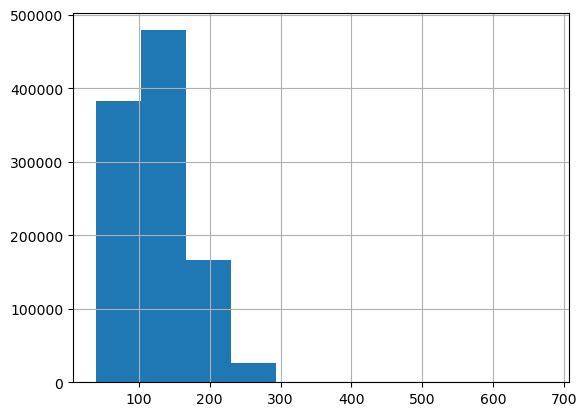

In [25]:
gm4di['선별포인트'].hist();

#### 4등급 경유차 선별포인트 샘플

In [26]:
gm4di.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'GRADE', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '운행제한건수', '우선차량선별기준',
       '시도', '선별포인트'],
      dtype='object')

In [57]:
gm4di.head()

,차대번호,차량번호,제원관리번호,차종,용도,최초등록일,연식,제작일자,검사유효일,배출가스인증번호,...,무부하매연판정2,무부하매연판정3,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,정기정밀,운행제한건수,우선차량선별기준,시도,선별포인트
0,WAUZZZ4F16N115327,21로7811,02420000100031305,승용,자가용,20060208,2006,20060119.00000,20200207.00000,4MY-AD-20,...,NaN,NaN,30.00000,4027.00000,NaN,정밀,0.00000,C,NaN,143.00000
1,WAUZZZ4F86N088157,04어9316,02420000100031305,승용,자가용,20060105,2006,20051212.00000,20200104.00000,4MY-AD-20,...,NaN,NaN,4.00000,4000.00000,NaN,정밀,0.00000,C,NaN,141.00000
2,WAUZZZ4F26N152385,07머3269,02420000100031305,승용,자가용,20060630,2006,20060612.00000,20220629.00000,4MY-AD-20,...,NaN,NaN,19.00000,NaN,NaN,정기,0.00000,C,NaN,97.00000
3,WAUZZZ4F36N107228,58거7827,02420000100031305,승용,자가용,20060322,2006,20060104.00000,20200321.00000,4MY-AD-20,...,NaN,NaN,5.00000,2920.00000,0.00000,정밀,0.00000,C,NaN,114.00000
4,WAUZZZ4F96N120159,64보3244,02420000100031305,승용,자가용,20060418,2006,20060411.00000,20220417.00000,4MY-AD-20,...,NaN,NaN,2.00000,2561.00000,0.00000,정밀,0.00000,C,NaN,121.00000


In [27]:
export4 = gm4di[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export4.shape

(1054032, 12)

In [28]:
export4 = export4.sort_values(['선별포인트'], ascending=False)
export4.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
47241,KMHJN81VP9U143755,22소6078,4311112100,2009,자가용,승용,중형,675.00000,0.00000,2077.65498,650.00000,0.00000
726068,KMFRA18NPBC043270,경남82아9185,4833033000,2011,영업용,화물,대형,611.00000,0.00000,2181.02486,268.00000,0.00000
720362,KMFGA17HPAC142432,경기91바3784,4159025321,2010,영업용,화물,중형,592.00000,9.00000,2009.98389,361.00000,0.00000
700778,KMFGA17HPAC130619,경기94아2289,4146110700,2010,영업용,화물,중형,589.00000,1.00000,1836.49325,540.00000,0.00000
700097,KMFGA17HPAC131841,충북80자4400,4311310400,2010,영업용,화물,중형,571.00000,9.00000,1719.21121,582.00000,0.00000


##### [출력] 4등급 경유차 샘플

In [29]:
# 44.0s
export4.iloc[:].to_csv(os.path.join(df_fold, 'BD3-3_4등급_선별포인트.csv'), index=False)

In [60]:
chc_col = {
    '차대번호':'VIN', 
    '차량번호':'VHRNO', # 자동차등록번호
    '법정동코드':'STDG_CD', 
    '연식':'YRIDNW', 
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_백만원':'SPRT_CST',
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [61]:
export4r = export4.rename(columns=chc_col)
export4r.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1', 'DY_AVRG_DRVNG_DSTNC',
       'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [62]:
export4r.head()

,VIN,VHRNO,STDG_CD,YRIDNW,PURPS_CD2,VHCTY_CD,VHCTY_TY,SELCT_PNT,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS
47241,KMHJN81VP9U143755,22소6078,4311112100,2009,자가용,승용,중형,675.00000,0.00000,2077.65498,650.00000,0.00000
726068,KMFRA18NPBC043270,경남82아9185,4833033000,2011,영업용,화물,대형,611.00000,0.00000,2181.02486,268.00000,0.00000
720362,KMFGA17HPAC142432,경기91바3784,4159025321,2010,영업용,화물,중형,592.00000,9.00000,2009.98389,361.00000,0.00000
700778,KMFGA17HPAC130619,경기94아2289,4146110700,2010,영업용,화물,중형,589.00000,1.00000,1836.49325,540.00000,0.00000
700097,KMFGA17HPAC131841,충북80자4400,4311310400,2010,영업용,화물,중형,571.00000,9.00000,1719.21121,582.00000,0.00000


In [80]:
# # 7.6s
# # BD3-3_4등급경유차_우선차량선별
# export4r.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

#### 5등급 경유 N급

In [30]:
gm5di.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수', '우선차량선별기준', '시도2'],
      dtype='object')

In [31]:
gm5di['검사일자'].isnull().sum()

0

In [32]:
gm5di['일일평균주행거리'].isnull().sum()

0

###### 조기폐차 선별포인트

In [33]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [34]:
gm5di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [35]:
gm5di[col].isnull().sum()

무부하매연측정치1    5944
일일평균주행거리        0
최근검사경과일         0
운행제한건수          0
dtype: int64

In [36]:
# nan 값 0으로 채우기
gm5di[col] = gm5di[col].fillna(0)
gm5di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [37]:
gm5di_corr = gm5di[col].corr()
gm5di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00000,-0.01561,0.00396,-0.03055
일일평균주행거리,-0.01561,1.00000,0.00162,0.01352
최근검사경과일,0.00396,0.00162,1.00000,0.03904
운행제한건수,-0.03055,0.01352,0.03904,1.00000


###### [출력] 5등급 경유차 선별조건 상관계수

In [38]:
t5 = pd.concat([gm5di_corr, gm5di_corr.sum()], axis=1)
t5 = t5.rename(columns={0:'합계'})
t5 = t5.reset_index()
t5

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00000,-0.01561,0.00396,-0.03055,0.95780
1,일일평균주행거리,-0.01561,1.00000,0.00162,0.01352,0.99953
2,최근검사경과일,0.00396,0.00162,1.00000,0.03904,1.04463
3,운행제한건수,-0.03055,0.01352,0.03904,1.00000,1.02201


In [39]:
t5.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [40]:
chc_col = {
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [41]:
t5r = t5.rename(columns=chc_col)
t5r

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT
0,무부하매연측정치1,1.00000,-0.01561,0.00396,-0.03055,0.95780
1,일일평균주행거리,-0.01561,1.00000,0.00162,0.01352,0.99953
2,최근검사경과일,0.00396,0.00162,1.00000,0.03904,1.04463
3,운행제한건수,-0.03055,0.01352,0.03904,1.00000,1.02201


###### [출력] 5등급경유차 상관계수

In [42]:
# # BD3-3_5등급경유차_상관계수
# t5r.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_DS_CRRLTN_CFFCNT.csv'), index=False)

In [43]:
gm5di_corr.sum()[col]

무부하매연측정치1   0.95780
일일평균주행거리    0.99953
최근검사경과일     1.04463
운행제한건수      1.02201
dtype: float64

In [44]:
c1, c2, c3, c4 = gm5di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.2380239470841802,
 0.24839459849011097,
 0.259600883427006,
 0.25398057099870286)

In [45]:
gm5di['선별포인트'] = np.round(w1 * gm5di['무부하매연측정치1'] + w2 * gm5di['일일평균주행거리'] + w3 * gm5di['최근검사경과일'] + w4 * gm5di['운행제한건수'], 0)
gm5di['선별포인트'].isnull().sum()

0

In [46]:
gm5di['선별포인트'].describe()

count   666281.00000
mean       138.89209
std         65.85388
min         43.00000
25%         95.00000
50%        127.00000
75%        171.00000
max      25429.00000
Name: 선별포인트, dtype: float64

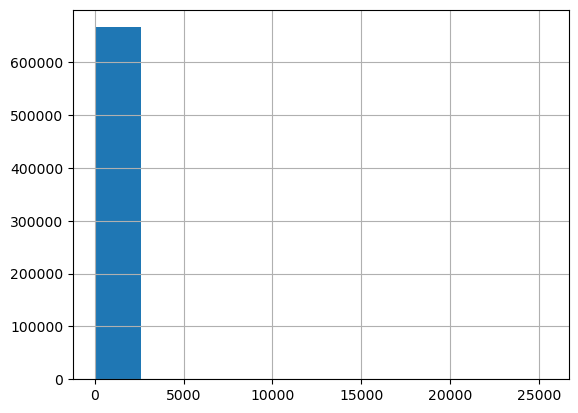

In [47]:
gm5di['선별포인트'].hist();

#### 5등급 경유차 선별포인트 샘플

In [48]:
gm5di.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수', '우선차량선별기준', '시도2', '선별포인트'],
      dtype='object')

In [49]:
gm5di['저감장치'].value_counts()

저감장치
DPF           89521
PM-NOx저감장치     1321
Name: count, dtype: int64

In [50]:
gm5di['배출가스등급'].unique()

array(['5', 'T5', 5], dtype=object)

In [58]:
gm5di.head()

,차량등록번호,본거지법정동코드,차대번호,제원관리번호,배출가스인증번호,배출가스등급,용도,차명,차종,차종유형,...,무부하매연판정2,무부하매연판정3,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,정기정밀,운행제한건수,우선차량선별기준,시도2,선별포인트
0,87로9835,4213011200,PN71C018511000000,30321400001063,NaN,5,자가용,JAM담프,화물,중형,...,NaN,NaN,3.00000,NaN,NaN,정기,0.00000,C,NaN,54.00000
1,94나8966,4777036030,KG70C151240,30421200000034,NaN,5,자가용,국산자동차,화물,대형,...,NaN,NaN,42.00000,NaN,NaN,정기,0.00000,C,NaN,121.00000
2,83구7469,4223032036,SL44C010921,00034313000053303,NaN,5,자가용,지엠씨,화물,대형,...,NaN,NaN,21.00000,NaN,NaN,정기,0.00000,C,NaN,96.00000
3,강원82자8897,4277036021,JE71C000963,30420400000000,NaN,5,영업용,삼양식트럭,화물,중형,...,NaN,NaN,0.00000,NaN,NaN,정기,0.00000,C,NaN,98.00000
4,94루2019,4211039022,CB71C001221,30312600000071,NaN,5,자가용,대전식담푸추럭,화물,중형,...,NaN,NaN,21.00000,NaN,NaN,정기,0.00000,C,NaN,108.00000


In [51]:
export5 = gm5di[[
    '차대번호', 
    '차량등록번호', 
    '본거지법정동코드', 
    '차량연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치',
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export5.shape

(666281, 13)

In [52]:
export5 = export5.sort_values('선별포인트', ascending=False)
export5.head()

,차대번호,차량등록번호,본거지법정동코드,차량연식,용도,차종,차종유형,저감장치,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
101661,KMYKP17CPYU414954,05루9403,2871025022,2000,자가용,승합,중형,NaN,25429.00000,21.00000,102073.36301,263.00000,5.00000
619288,KMFLA18EP7C022656,충남94바1614,4427010100,2007,영업용,화물,대형,NaN,572.00000,5.00000,1185.56230,1065.00000,0.00000
179589,410234338117,90더7549,4137010300,2002,자가용,화물,대형,DPF,561.00000,0.00000,1278.55168,939.00000,0.00000
80180,KN3HDP3361K740793,86두9741,4215033024,2001,자가용,화물,중형,NaN,516.00000,999.90000,50.91004,1023.00000,0.00000
612418,KMFGA17PP7C067736,서울85바5177,1150010500,2007,영업용,화물,중형,NaN,503.00000,12.00000,1629.00421,368.00000,0.00000


##### [출력] 5등급 경유차 샘플

In [53]:
# 
export5.iloc[:].to_csv(os.path.join(df_fold, 'BD3-3_5등급_선별포인트.csv'), index=False)

In [63]:
chc_col = {
    '차대번호':'VIN', 
    '차량등록번호':'VHRNO', # 자동차등록번호
    '본거지법정동코드':'STDG_CD', 
    '차량연식':'YRIDNW', # 연식
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '저감장치':'RDCDVC',
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_조기폐차_백만원':'SPRT_CST_ELPDSRC',
    '지원비용_DPF_백만원':'SPRT_CST_DPF', 
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [64]:
export5r = export5.rename(columns=chc_col)
export5r.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'RDCDVC', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1',
       'DY_AVRG_DRVNG_DSTNC', 'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [65]:
export5r.head()

,VIN,VHRNO,STDG_CD,YRIDNW,PURPS_CD2,VHCTY_CD,VHCTY_TY,RDCDVC,SELCT_PNT,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS
101661,KMYKP17CPYU414954,05루9403,2871025022,2000,자가용,승합,중형,NaN,25429.00000,21.00000,102073.36301,263.00000,5.00000
619288,KMFLA18EP7C022656,충남94바1614,4427010100,2007,영업용,화물,대형,NaN,572.00000,5.00000,1185.56230,1065.00000,0.00000
179589,410234338117,90더7549,4137010300,2002,자가용,화물,대형,DPF,561.00000,0.00000,1278.55168,939.00000,0.00000
80180,KN3HDP3361K740793,86두9741,4215033024,2001,자가용,화물,중형,NaN,516.00000,999.90000,50.91004,1023.00000,0.00000
612418,KMFGA17PP7C067736,서울85바5177,1150010500,2007,영업용,화물,중형,NaN,503.00000,12.00000,1629.00421,368.00000,0.00000


In [2020]:
# # 5.5s
# # BD3-3_5등급경유차_우선차량선별
# export5r.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

# 시각화

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [122]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [123]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [124]:
export4.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '선별포인트', '무부하매연측정치1',
       '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

In [125]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '저감장치',
       '선별포인트_DPF', '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수',
       '지원비용_조기폐차_백만원', '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

In [126]:
export4['선별포인트'].describe()

count   1074156.00000
mean         26.93745
std           9.74710
min           5.00000
25%          21.00000
50%          27.00000
75%          34.00000
max         108.00000
Name: 선별포인트, dtype: float64

# 선별포인트

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

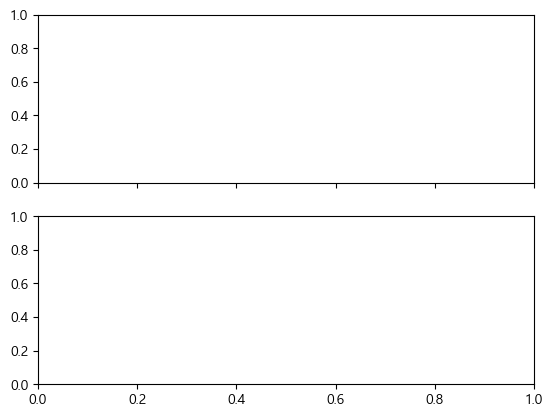

In [158]:
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
d = .7    # how big to make the diagonal lines in axes coordinates

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1 = sns.histplot(data=export4, y='선별포인트', bins=20, ax=ax1)
ax2 = sns.histplot(data=export4, y='선별포인트', bins=20, ax=ax2)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.yaxis.grid()
ax2.yaxis.grid()

ax1.set_ylim(190000, 200000)
ax2.set_ylim(0, 10000)

ax1.set_yticks([190000, 192000, 194000, 196000, 198000, 200000])
ax2.set_yticks([0, 2000, 4000, 6000, 8000, 10000])

plt.show()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\417586926.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\417586926.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


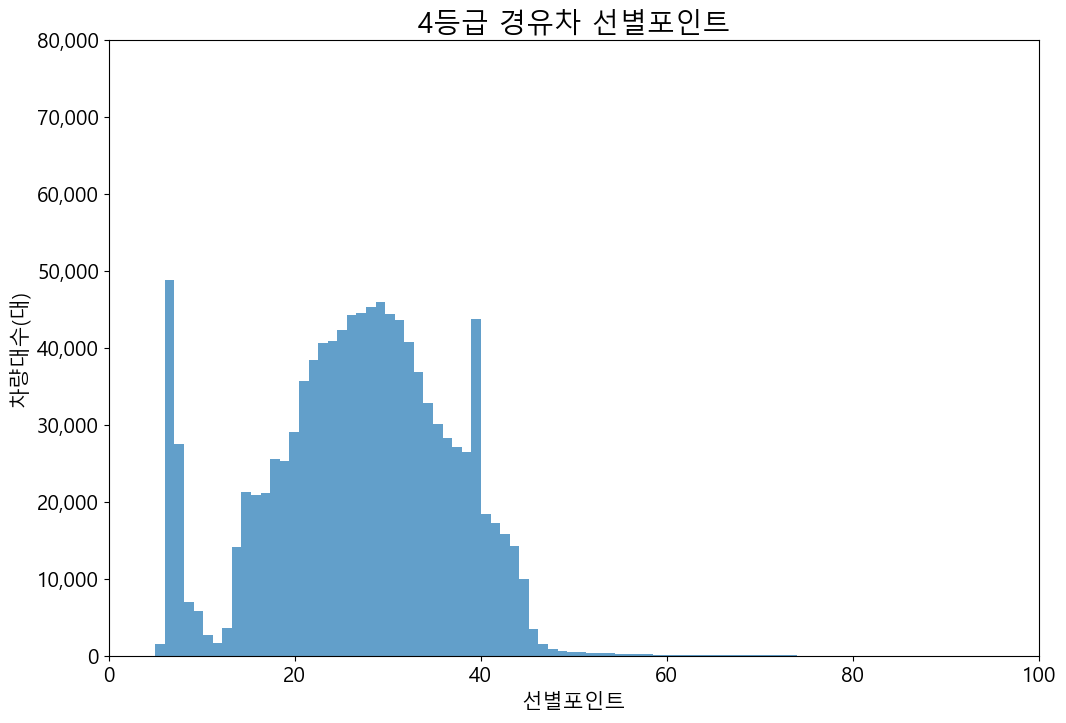

In [182]:
fig = plt.figure(figsize=(12, 8))
plt.ylim(0, 8*10000)
plt.xlim(0,100)
plt.title('4등급 경유차 선별포인트', fontsize=20)
plt.xlabel('선별포인트', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(export4['선별포인트'], bins=100, alpha=0.7)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

In [850]:
temp = export5.fillna(0)
temp.shape

(696946, 16)

In [852]:
temp.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

In [140]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '저감장치',
       '선별포인트_조기폐차', '선별포인트_DPF', '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수',
       '지원비용_조기폐차_백만원', '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\3477423802.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\3477423802.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


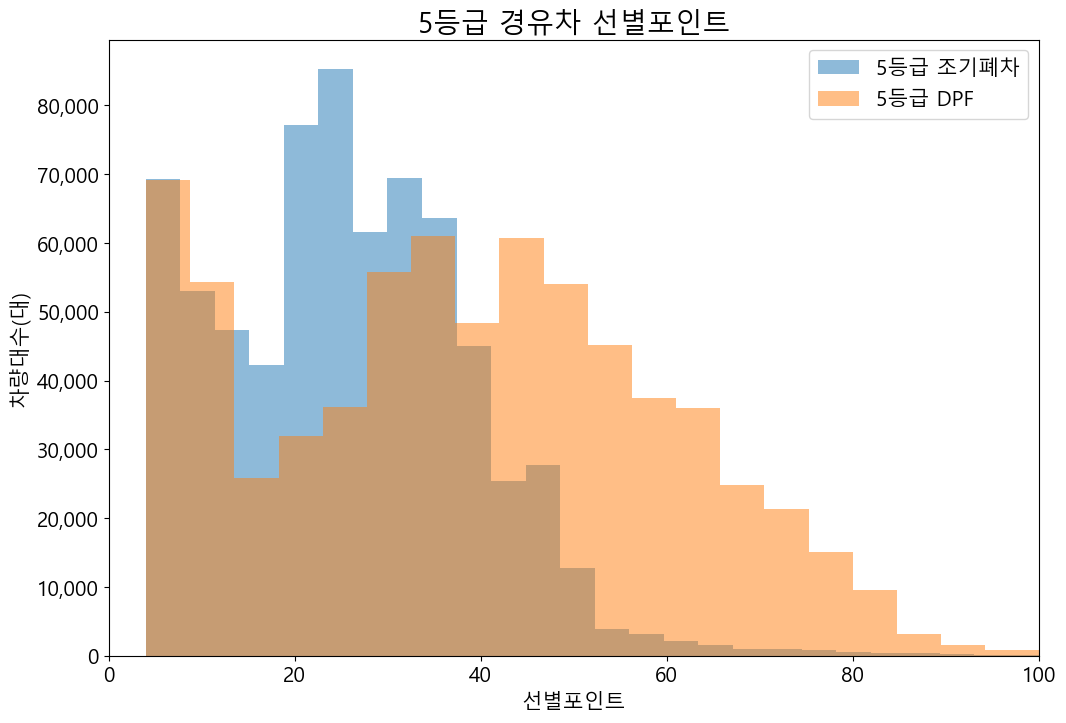

In [185]:
plt.figure(figsize=(12, 8))
plt.xlabel('선별포인트', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title('5등급 경유차 선별포인트', fontsize=20)
plt.hist(export5["선별포인트_조기폐차"], bins=100, alpha=0.5, label='5등급 조기폐차')
plt.hist(export5["선별포인트_DPF"], bins=100, alpha=0.5, label='5등급 DPF')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(fontsize=15)

C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\2931775649.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\2931775649.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


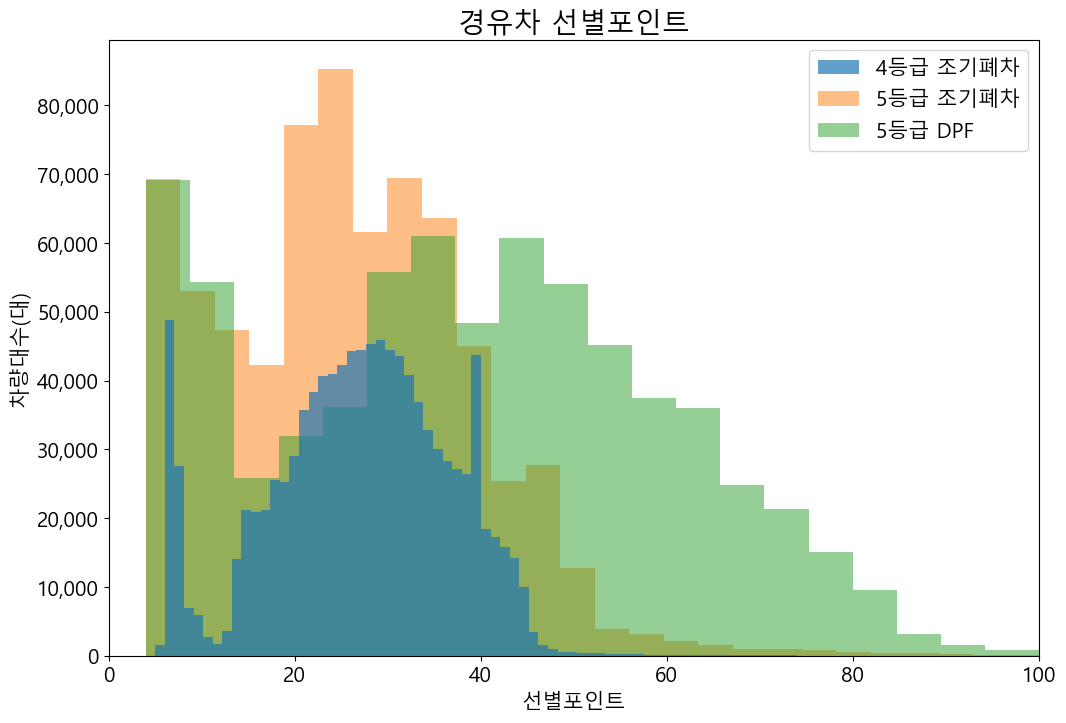

In [184]:
plt.figure(figsize=(12, 8))
plt.xlabel('선별포인트', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title('경유차 선별포인트', fontsize=20)
plt.hist(export4["선별포인트"], bins=100, alpha=0.7, label='4등급 조기폐차', zorder=3)
plt.hist(export5["선별포인트_조기폐차"], bins=100, alpha=0.5, label='5등급 조기폐차')
plt.hist(export5["선별포인트_DPF"], bins=100, alpha=0.5, label='5등급 DPF')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(fontsize=15)

In [841]:
temp = gm4.groupby(['용도'])['차대번호'].count().reset_index()
temp

,용도,차대번호
0,관용,4853
1,영업용,38476
2,자가용,1458906


In [859]:
export4['용도'].unique()

array(['자가용', '관용', '영업용'], dtype=object)

C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\1084442590.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\1084442590.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(20.0, 0, '20'),
 Text(40.0, 0, '40'),
 Text(60.0, 0, '60'),
 Text(80.0, 0, '80'),
 Text(100.0, 0, '100')]

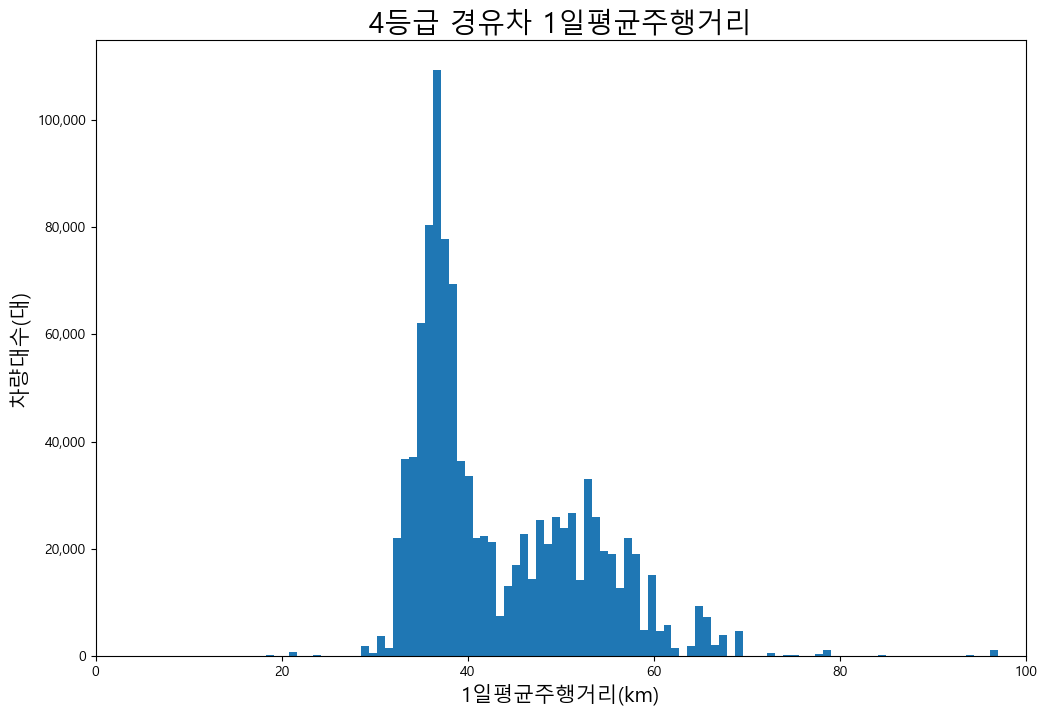

In [205]:
plt.figure(figsize=(12, 8))
plt.xlabel('1일평균주행거리(km)', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xlim(0, 100)
plt.title('4등급 경유차 1일평균주행거리', fontsize=20)
plt.hist(export4["1일평균주행거리"], bins=300);
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\2665714368.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\2665714368.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(20.0, 0, '20'),
 Text(40.0, 0, '40'),
 Text(60.0, 0, '60'),
 Text(80.0, 0, '80'),
 Text(100.0, 0, '100')]

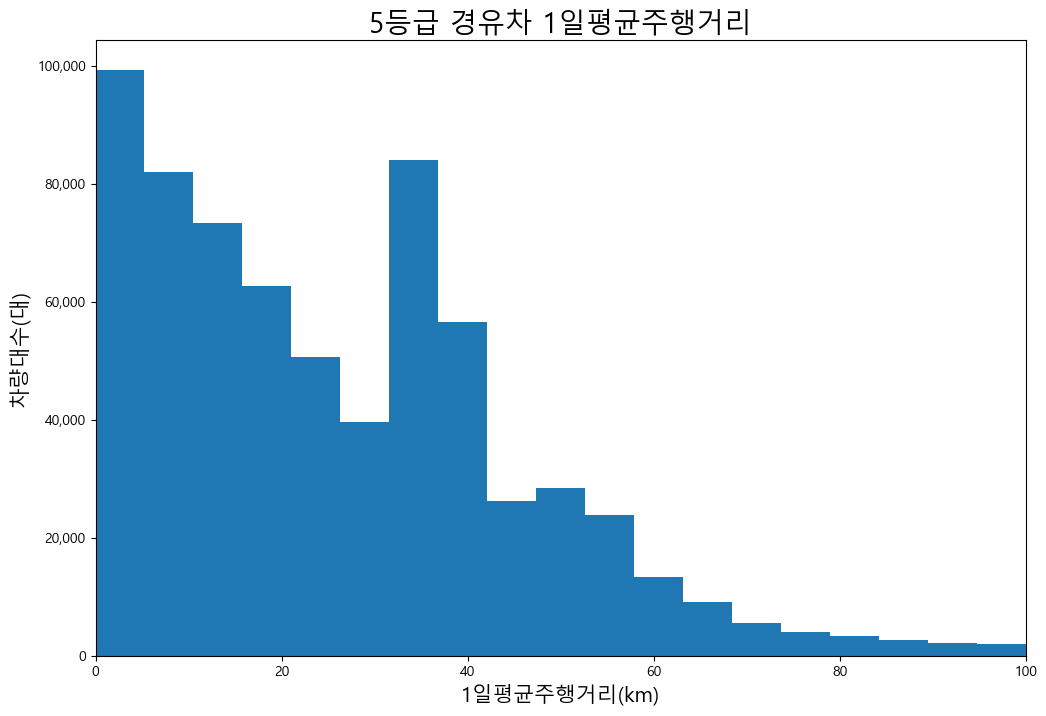

In [206]:
plt.figure(figsize=(12, 8))
plt.xlabel('1일평균주행거리(km)', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xlim(0, 100)
plt.title('5등급 경유차 1일평균주행거리', fontsize=20)
plt.hist(export5["1일평균주행거리"], bins=500);
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\1854555815.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\kbjung\AppData\Local\Temp\ipykernel_9340\1854555815.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


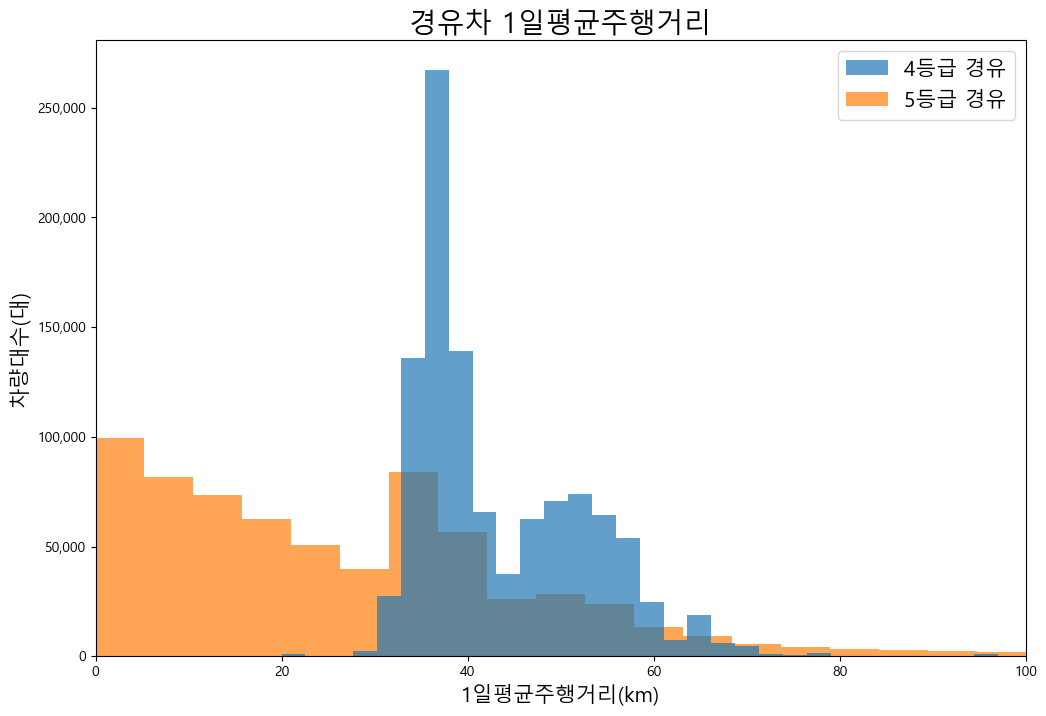

In [200]:
plt.figure(figsize=(12, 8))
plt.xlabel('1일평균주행거리(km)', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xlim(0, 100)
plt.title('경유차 1일평균주행거리', fontsize=20)
plt.hist(export4["1일평균주행거리"], bins=100, alpha=0.7, label='4등급 경유', zorder=2)
plt.hist(export5["1일평균주행거리"], bins=500, alpha=0.7, label='5등급 경유', zorder=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(fontsize=15)

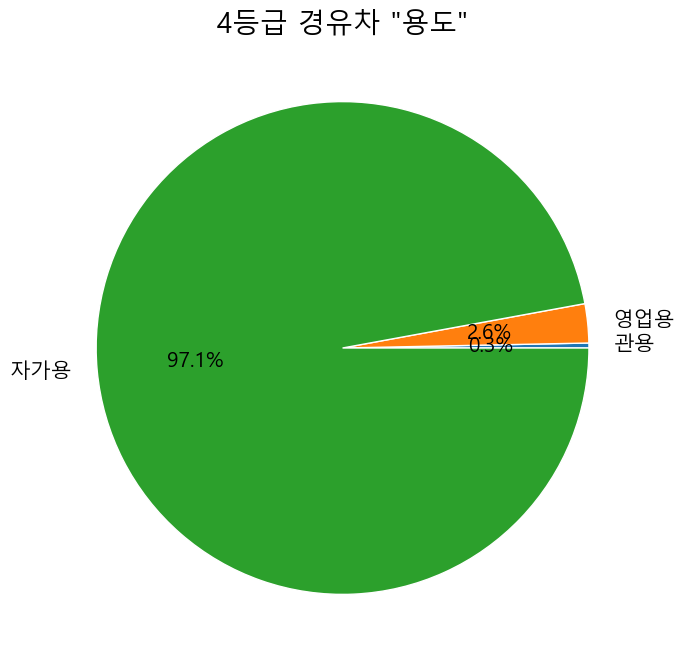

In [842]:
plt.figure(figsize=(8, 8))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(temp['차대번호'], labels=temp['용도'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});

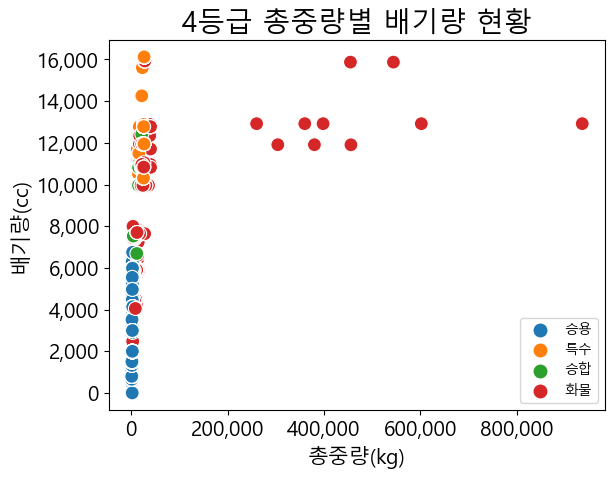

In [1008]:
plt.title('4등급 총중량별 배기량 현황', fontsize=20)
plt.xlabel('총중량(kg)', fontsize=15)
plt.ylabel('배기량(cc)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.scatterplot(data=gm4, x='총중량', y='배기량', hue='차종', s=100)
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(markerscale=1.5);

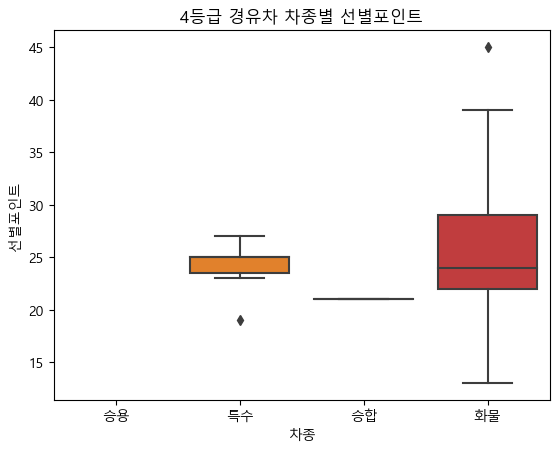

In [823]:
plt.title('4등급 경유차 차종별 선별포인트')
sns.boxplot(data=export4, x='차종', y='선별포인트');

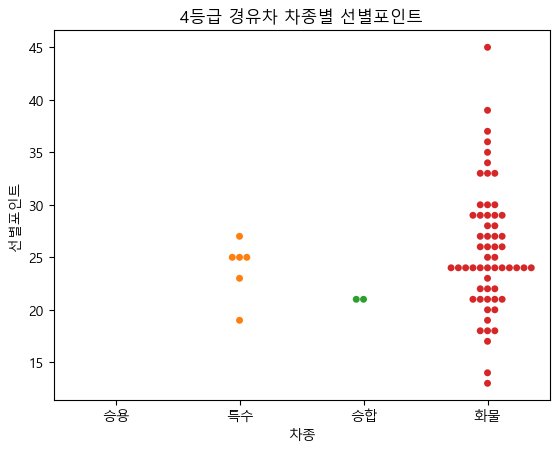

In [824]:
plt.title('4등급 경유차 차종별 선별포인트')
sns.swarmplot(data=export4, x='차종', y='선별포인트');

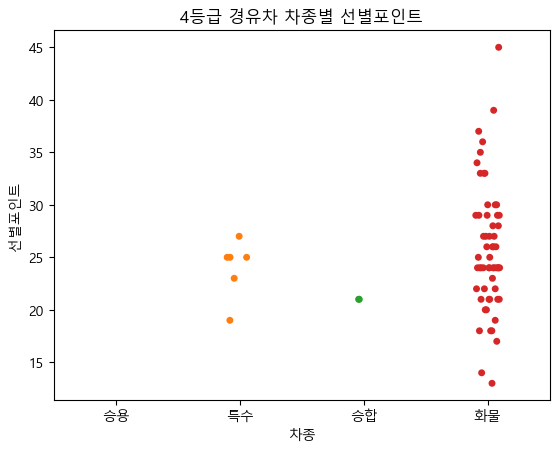

In [825]:
plt.title('4등급 경유차 차종별 선별포인트')
sns.stripplot(data=export4, x='차종', y='선별포인트');

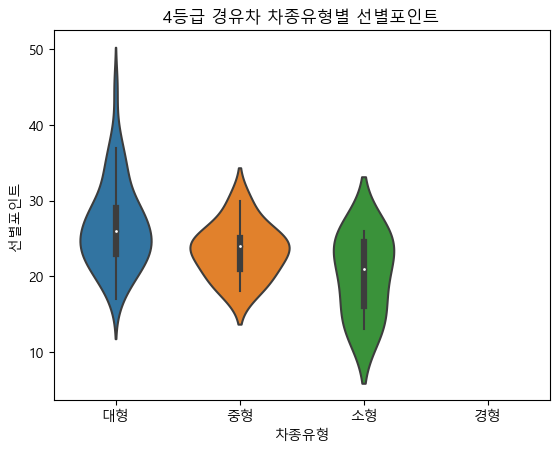

In [826]:
plt.title('4등급 경유차 차종유형별 선별포인트')
sns.violinplot(data=export4, x='차종유형', y='선별포인트');

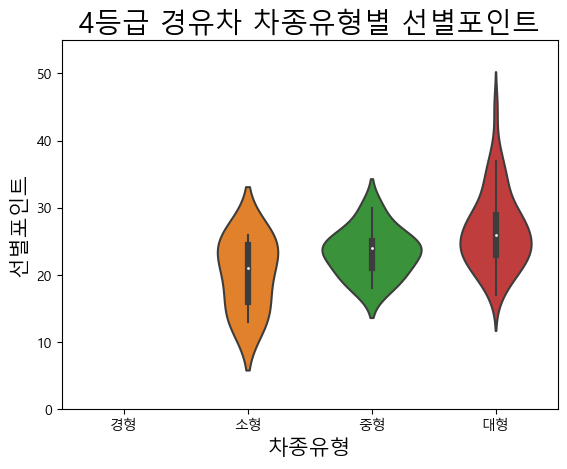

In [971]:
plt.title('4등급 경유차 차종유형별 선별포인트', fontsize=20)
plt.xlabel('차종유형', fontsize=15)
plt.ylabel('선별포인트', fontsize=15)
plt.ylim(0, 55)
sns.violinplot(data=export4, x='차종유형', y='선별포인트', order=['경형', '소형', '중형', '대형']);

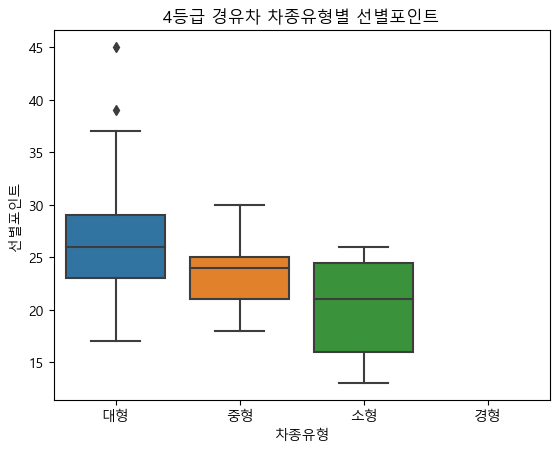

In [827]:
plt.title('4등급 경유차 차종유형별 선별포인트')
sns.boxplot(data=export4, x='차종유형', y='선별포인트');

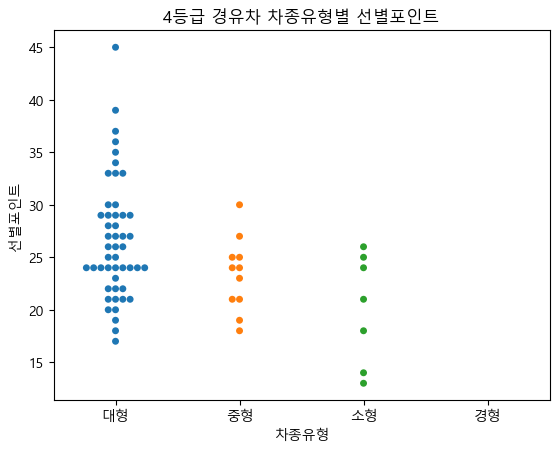

In [828]:
plt.title('4등급 경유차 차종유형별 선별포인트')
sns.swarmplot(data=export4, x='차종유형', y='선별포인트');

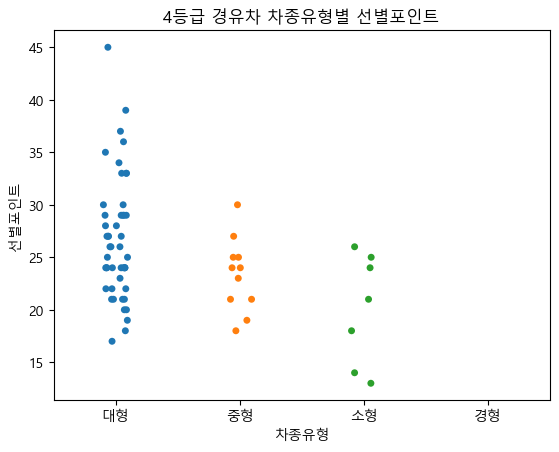

In [829]:
plt.title('4등급 경유차 차종유형별 선별포인트')
sns.stripplot(data=export4, x='차종유형', y='선별포인트');

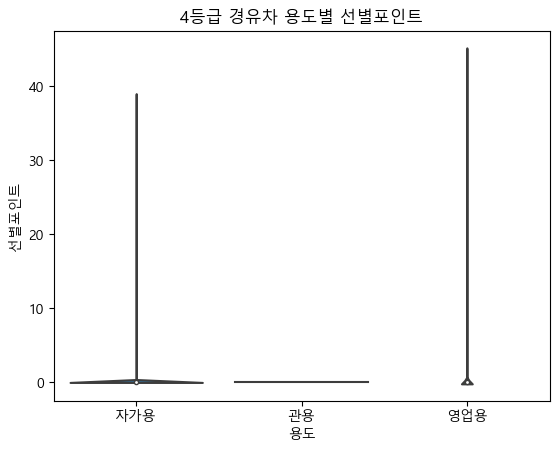

In [861]:
plt.title('4등급 경유차 용도별 선별포인트')
sns.violinplot(data=export4.fillna(0), x='용도', y='선별포인트');

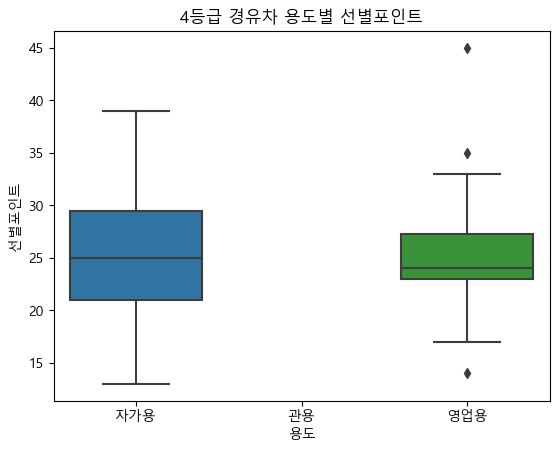

In [831]:
plt.title('4등급 경유차 용도별 선별포인트')
sns.boxplot(data=export4, x='용도', y='선별포인트');

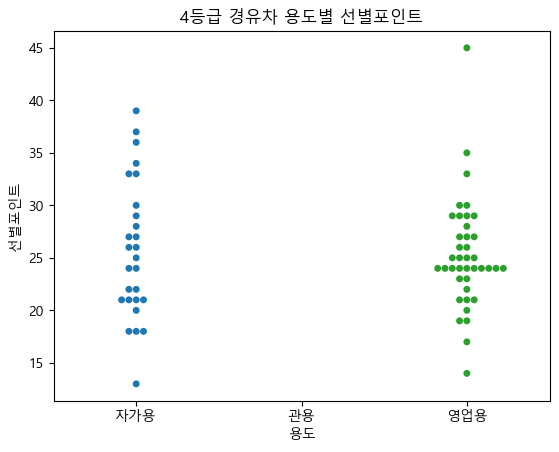

In [832]:
plt.title('4등급 경유차 용도별 선별포인트')
sns.swarmplot(data=export4, x='용도', y='선별포인트');

In [880]:
temp = export4.groupby('용도')['선별포인트'].sum().reset_index()
temp

,용도,선별포인트
0,관용,0.00000
1,영업용,1010.00000
2,자가용,693.00000


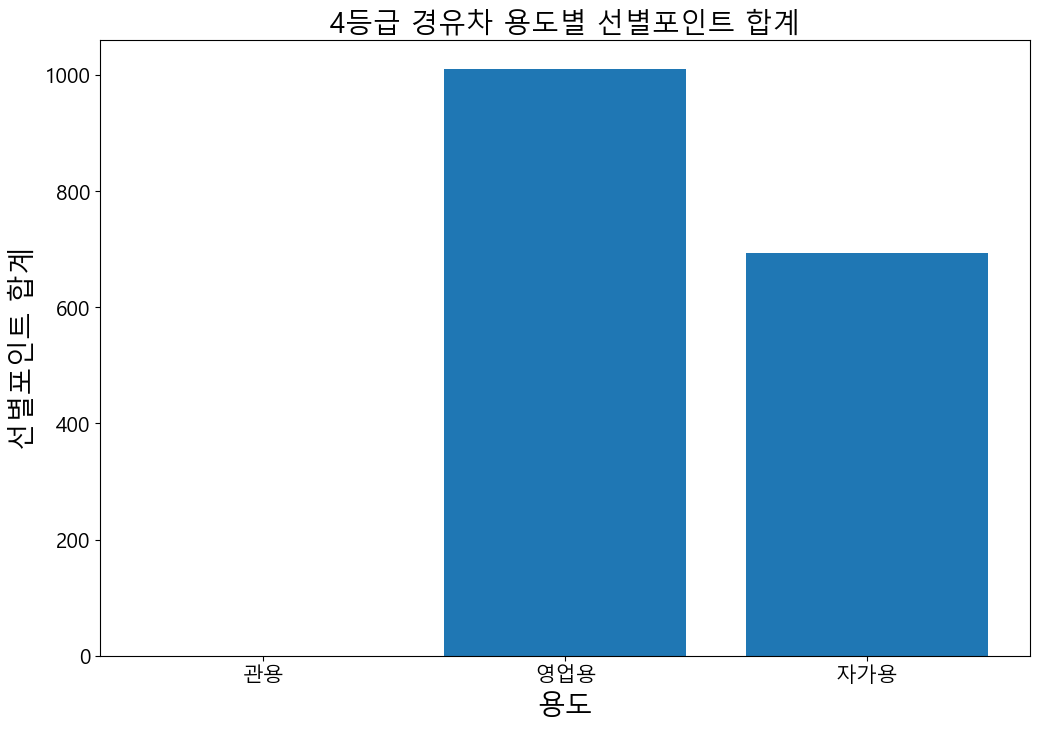

In [890]:
plt.figure(figsize=(12, 8))
plt.xlabel('용도', fontsize=20)
plt.ylabel('선별포인트 합계', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('4등급 경유차 용도별 선별포인트 합계', fontsize=20)
plt.bar(data=temp, x='용도', height='선별포인트');

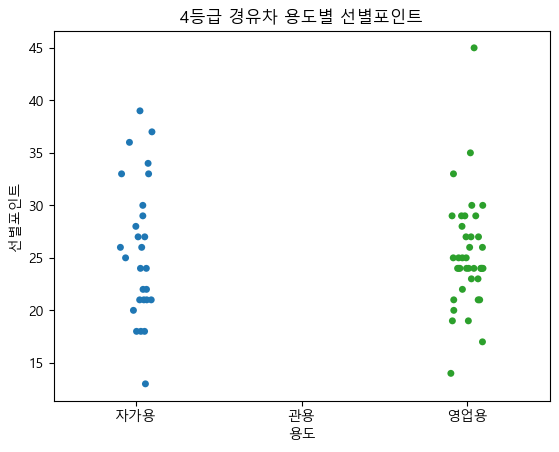

In [833]:
plt.title('4등급 경유차 용도별 선별포인트')
sns.stripplot(data=export4, x='용도', y='선별포인트');

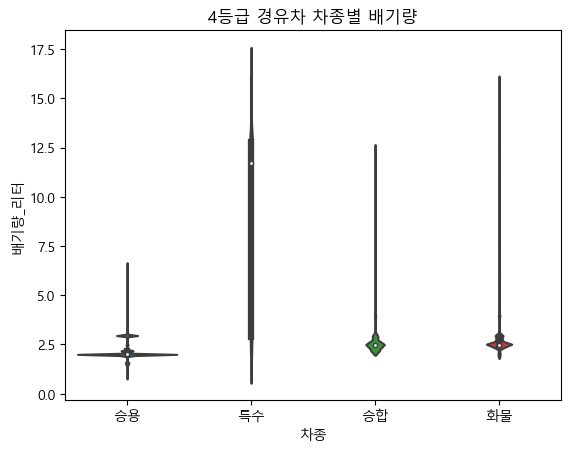

In [834]:
plt.title('4등급 경유차 차종별 배기량')
sns.violinplot(data=export4, x='차종', y='배기량_리터');

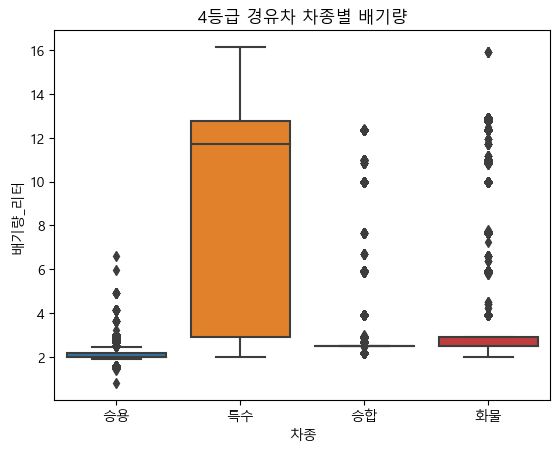

In [835]:
plt.title('4등급 경유차 차종별 배기량')
sns.boxplot(data=export4, x='차종', y='배기량_리터');

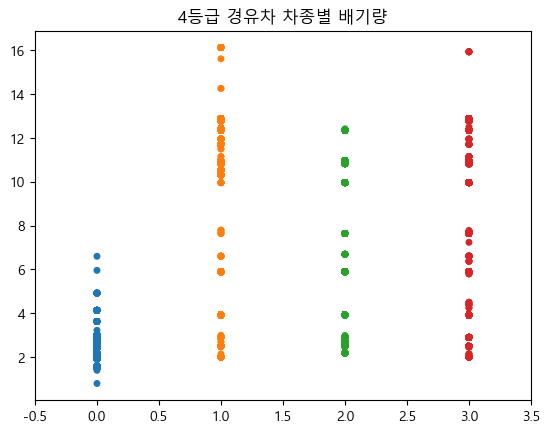

In [836]:
# 
plt.title('4등급 경유차 차종별 배기량')
sns.swarmplot(data=export4, x='차종', y='배기량_리터');

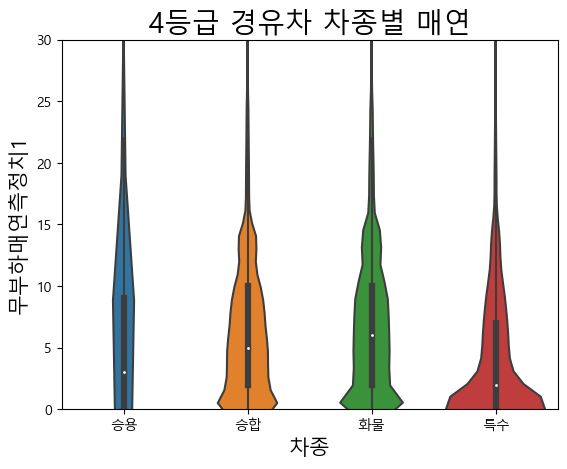

In [972]:
plt.title('4등급 경유차 차종별 매연', fontsize=20)
plt.xlabel('차종', fontsize=15)
plt.ylabel('매연', fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.ylim(0, 30)
sns.violinplot(data=export4, x='차종', y='무부하매연측정치1', order=['승용', '승합', '화물', '특수']);

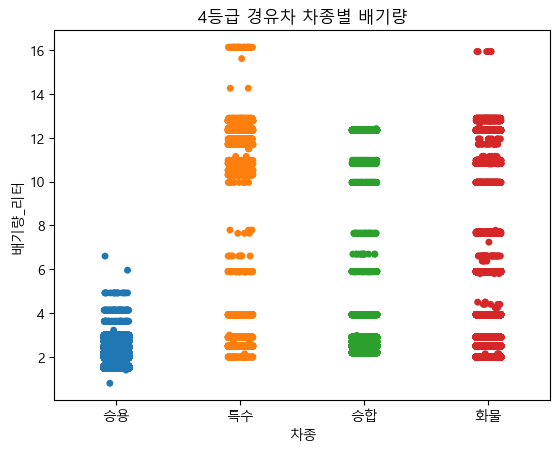

In [ ]:
plt.title('4등급 경유차 차종별 배기량')
sns.stripplot(data=export4, x='차종', y='배기량_리터');

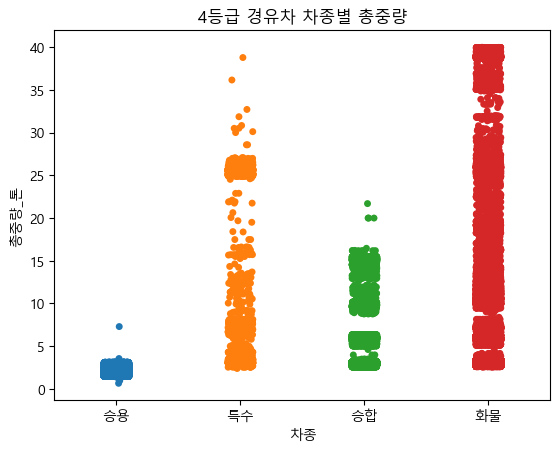

In [ ]:
plt.title('4등급 경유차 차종별 총중량')
sns.stripplot(data=export4, x='차종', y='총중량_톤');

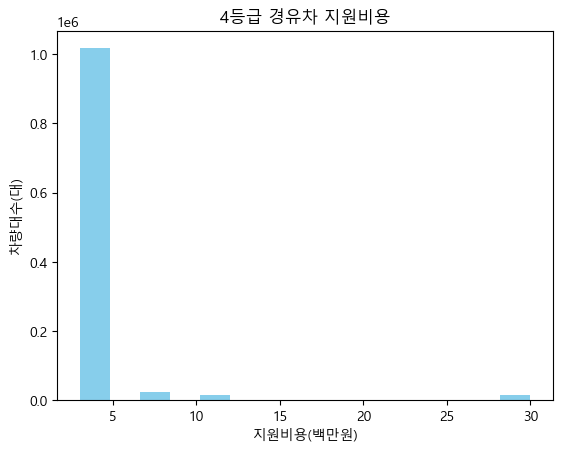

In [872]:
plt.title('4등급 경유차 지원비용')
plt.xlabel('지원비용(백만원)')
plt.ylabel('차량대수(대)')
plt.hist(export4['지원비용_백만원'], bins=15, color='skyblue');

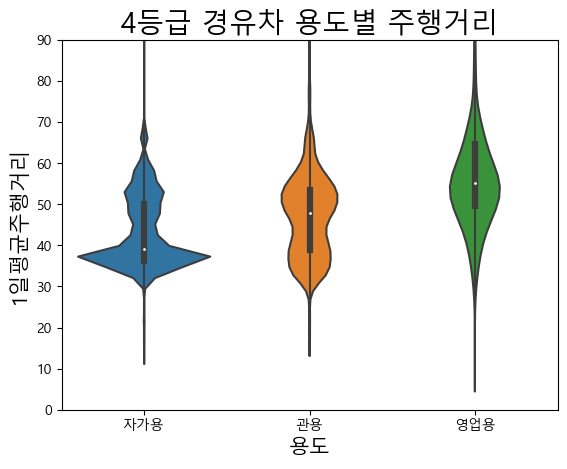

In [973]:
plt.title('4등급 경유차 용도별 주행거리', fontsize=20)
plt.xlabel('용도', fontsize=15)
plt.ylabel('주행거리', fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.ylim(0, 90)
sns.violinplot(data=export4, x='용도', y='1일평균주행거리');

In [982]:
temp = export4.groupby(['운행제한건수'])['차대번호'].count().reset_index()
temp

,운행제한건수,차대번호
0,0.00000,12
1,1.00000,10
2,2.00000,10
3,3.00000,6
4,4.00000,5
5,5.00000,14
6,6.00000,4
7,7.00000,2
8,8.00000,2
9,9.00000,2


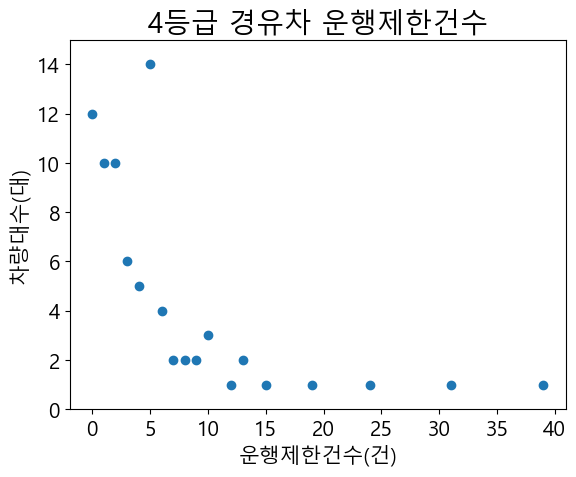

In [984]:
plt.title('4등급 경유차 운행제한건수', fontsize=20)
plt.xlabel('운행제한건수(건)', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 15)
plt.scatter(data=temp, x='운행제한건수', y='차대번호');

In [974]:
temp = export4[export4['용도'] == '자가용']
temp.shape

(1032760, 15)

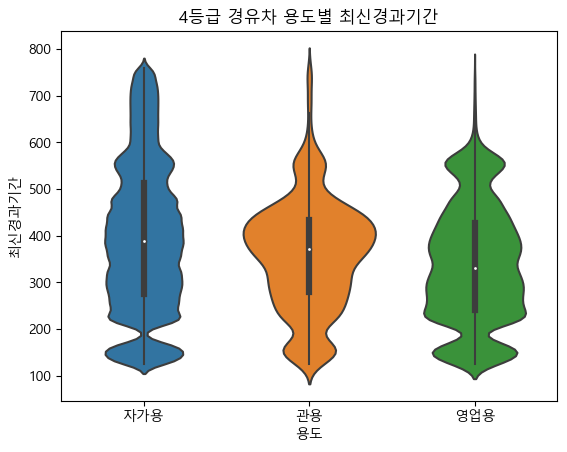

In [976]:
plt.title('4등급 경유차 용도별 최신경과기간')
sns.violinplot(data=export4, x='용도', y='최신경과기간');

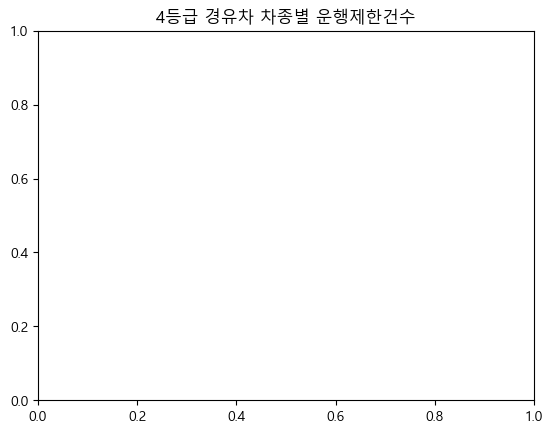

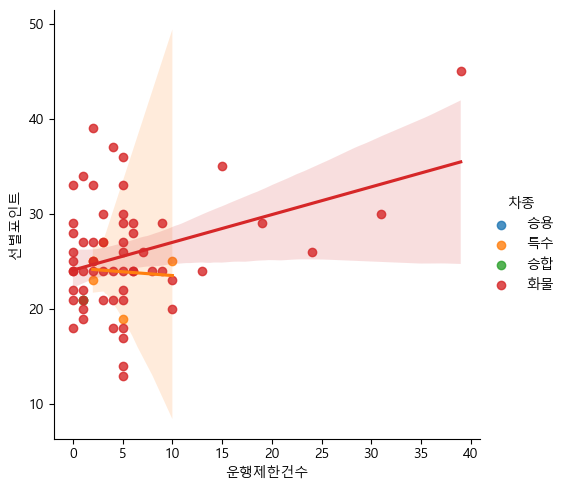

In [448]:
plt.title('4등급 경유차 차종별 운행제한건수')
sns.lmplot(data=export4, x='운행제한건수', y='선별포인트', hue='차종');

In [397]:
export4.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '선별포인트', '무부하매연측정치1',
       '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

In [449]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

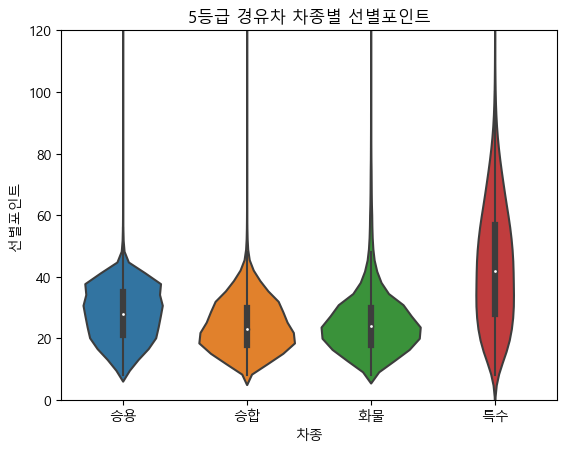

In [985]:
plt.title('5등급 경유차 차종별 선별포인트')
plt.ylim(0, 120)
sns.violinplot(data=export5, x='차종', y='선별포인트', order=['승용', '승합', '화물', '특수']);

In [913]:
temp = export5.groupby('차종유형')['선별포인트'].sum().reset_index()
temp

,차종유형,선별포인트
0,경형,0.00000
1,대형,2616513.00000
2,소형,2160455.00000
3,중형,3439084.00000


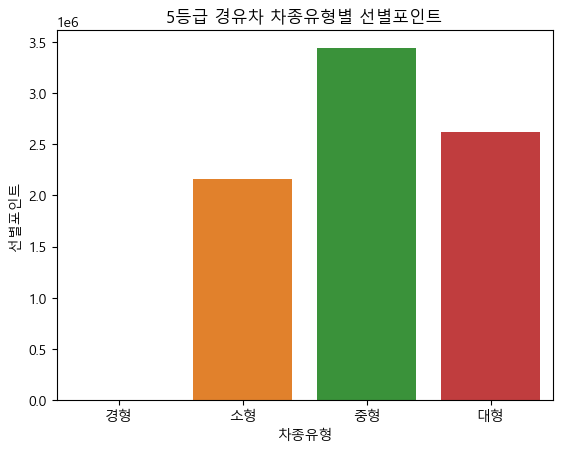

In [914]:
plt.title('5등급 경유차 차종유형별 선별포인트')
sns.barplot(data=temp, x='차종유형', y='선별포인트', order=['경형', '소형', '중형', '대형']);

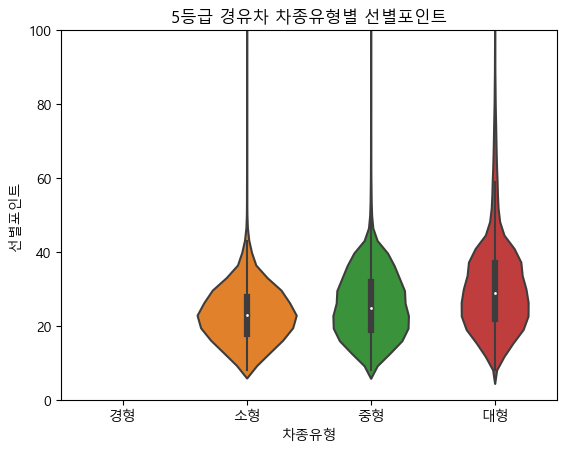

In [986]:
plt.title('5등급 경유차 차종유형별 선별포인트')
plt.ylim(0, 100)
sns.violinplot(data=export5, x='차종유형', y='선별포인트', order=['경형', '소형', '중형', '대형']);

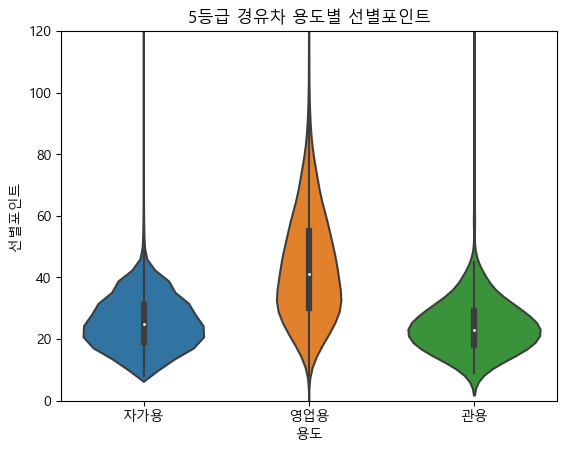

In [987]:
plt.title('5등급 경유차 용도별 선별포인트')
plt.ylim(0, 120)
sns.violinplot(data=export5, x='용도', y='선별포인트');

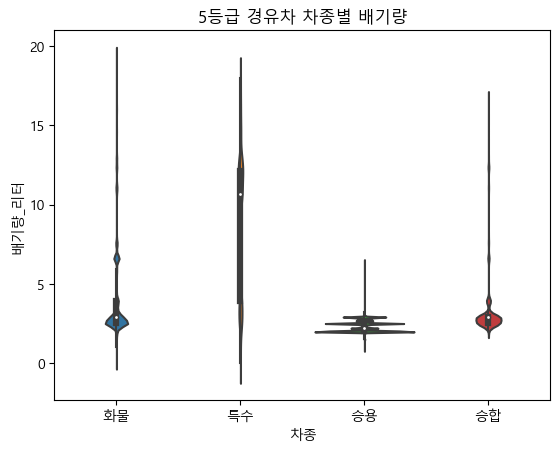

In [464]:
plt.title('5등급 경유차 차종별 배기량')
sns.violinplot(data=export5, x='차종', y='배기량_리터');

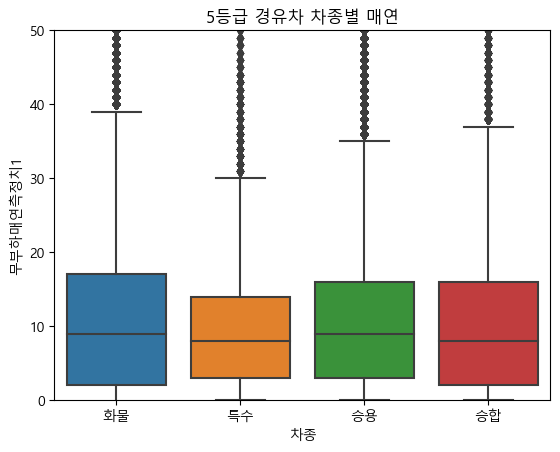

In [988]:
plt.title('5등급 경유차 차종별 매연')
plt.ylim(0, 50)
sns.boxplot(data=export5, x='차종', y='무부하매연측정치1');

In [967]:
temp = export5[(export5['차종'] == '특수') & (export5['총중량_톤'].isnull() == False)]
temp.shape

(11749, 16)

In [968]:
temp.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

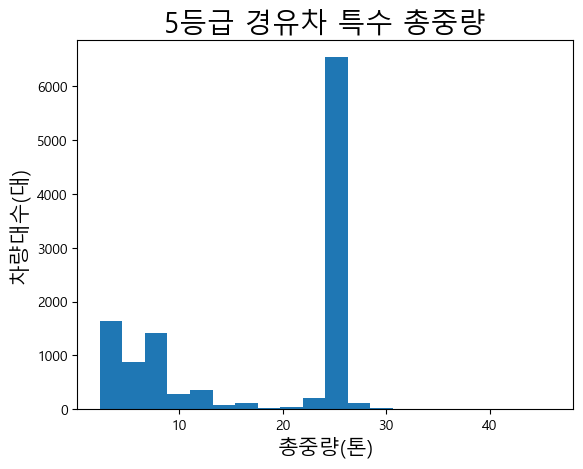

In [969]:
plt.title('5등급 경유차 특수 총중량', fontsize=20)
plt.xlabel('총중량(톤)', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.hist(temp['총중량_톤'], bins=20);

In [476]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

In [935]:
temp = export5.groupby(['차종'])['지원비용_조기폐차_백만원'].sum().reset_index()
temp

,차종,지원비용_조기폐차_백만원
0,승용,677071.00000
1,승합,210995.00000
2,특수,247690.60000
3,화물,2750493.20000


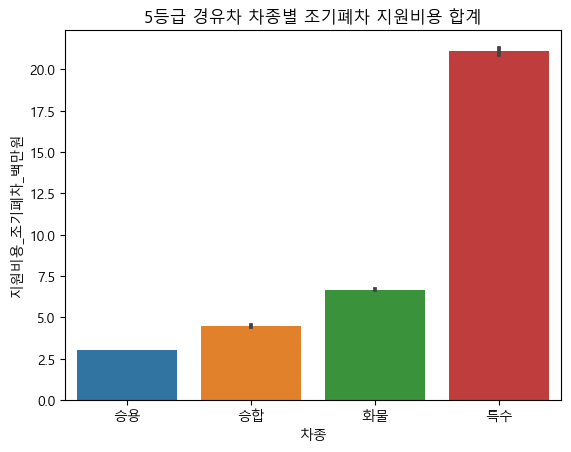

In [938]:
plt.title('5등급 경유차 차종별 조기폐차 지원비용 합계')
sns.barplot(data=export5, x='차종', y='지원비용_조기폐차_백만원', order=['승용', '승합', '화물', '특수']);

In [939]:
temp = export5.groupby(['차종'])['지원비용_DPF_백만원'].sum().reset_index()
temp

,차종,지원비용_DPF_백만원
0,승용,75694.14000
1,승합,15853.16700
2,특수,1277.07800
3,화물,366124.48600


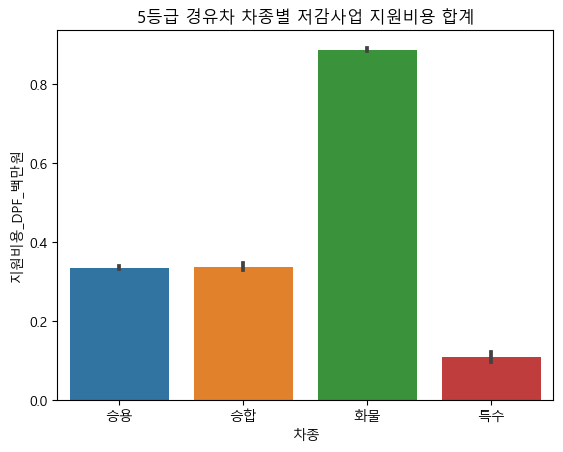

In [941]:
plt.title('5등급 경유차 차종별 저감사업 지원비용 합계')
sns.barplot(data=export5, x='차종', y='지원비용_DPF_백만원',order=['승용', '승합', '화물', '특수']);

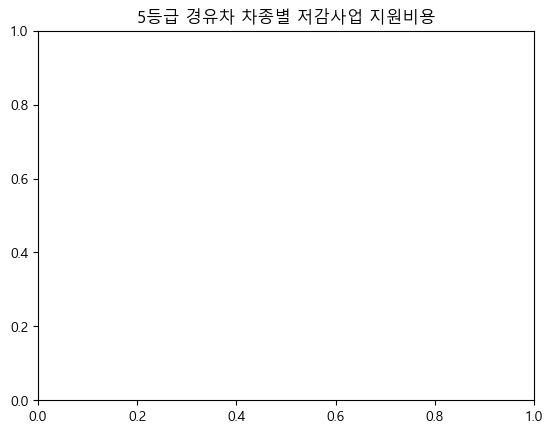

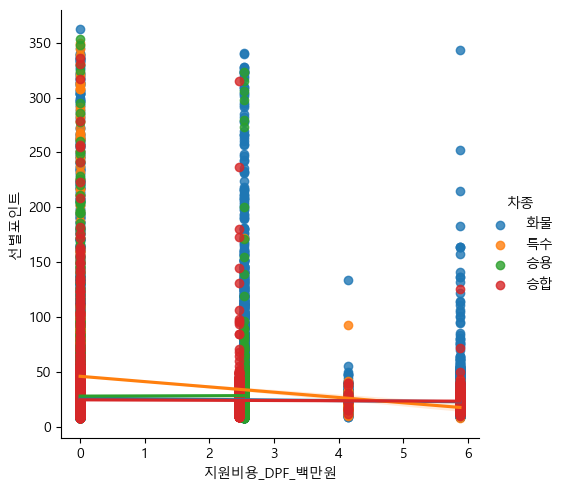

In [482]:
plt.title('5등급 경유차 차종별 저감사업 지원비용')
sns.lmplot(data=export5, x='지원비용_DPF_백만원', y='선별포인트', hue='차종');

In [943]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한건수', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량_리터', '총중량_톤'],
      dtype='object')

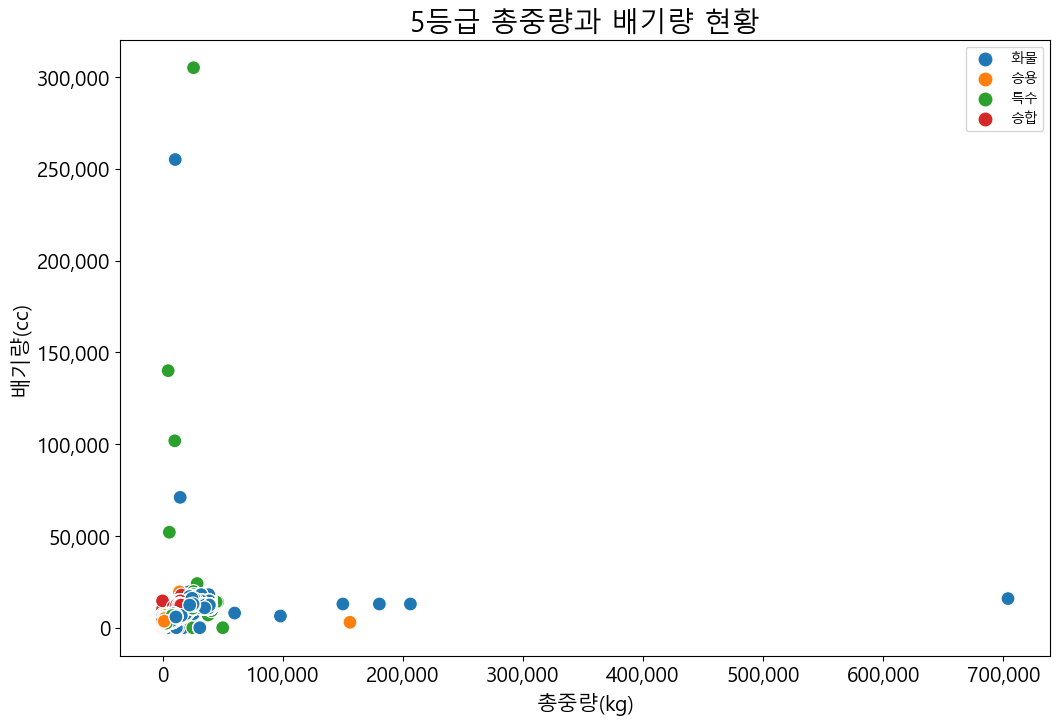

In [1009]:
plt.figure(figsize=(12,8))
plt.xlabel('총중량(kg)', fontsize=15)
plt.ylabel('배기량(cc)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('5등급 총중량과 배기량 현황', fontsize=20)
ax = sns.scatterplot(data=gm5, x='총중량', y='배기량', hue='차종', s=100)
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(markerscale=1.5);

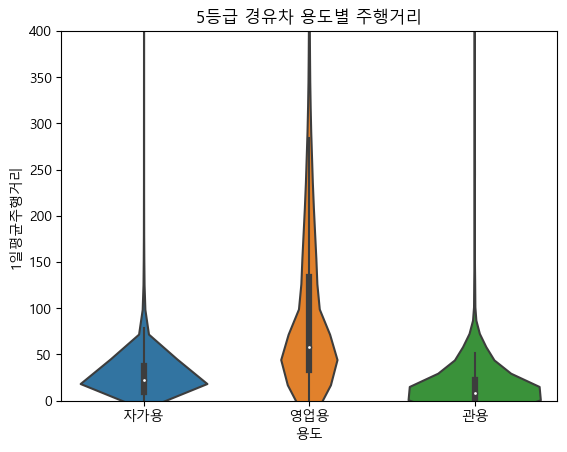

In [989]:
plt.title('5등급 경유차 용도별 주행거리')
plt.ylim(0, 400)
sns.violinplot(data=export5, x='용도', y='1일평균주행거리');

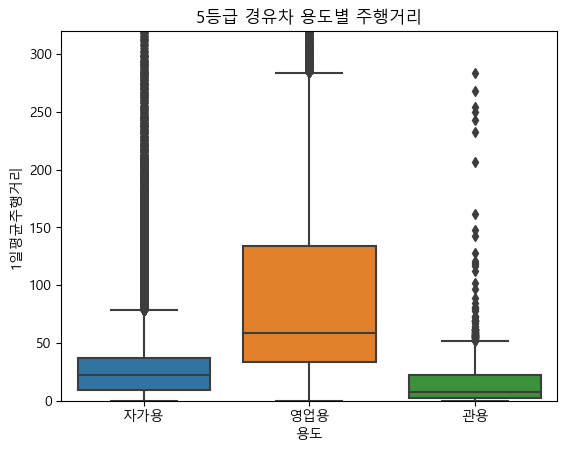

In [990]:
plt.title('5등급 경유차 용도별 주행거리')
plt.ylim(0, 320)
sns.boxplot(data=export5, x='용도', y='1일평균주행거리');

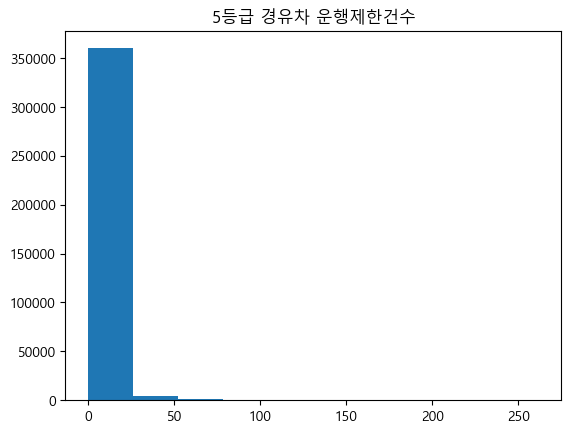

In [496]:
plt.title('5등급 경유차 운행제한건수')
plt.hist(data=export5, x='운행제한건수');

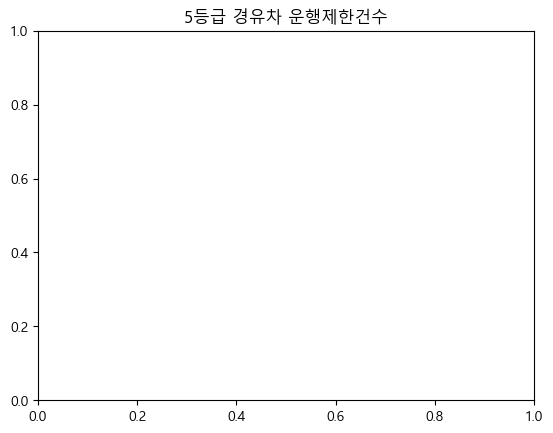

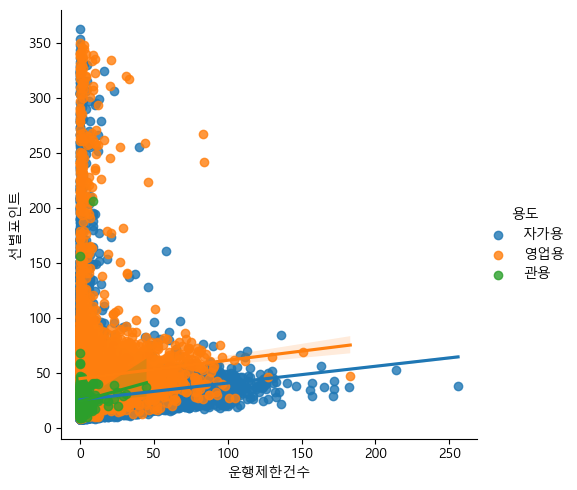

In [498]:
plt.title('5등급 경유차 운행제한건수')
sns.lmplot(data=export5, x='운행제한건수', y='선별포인트', hue='용도');

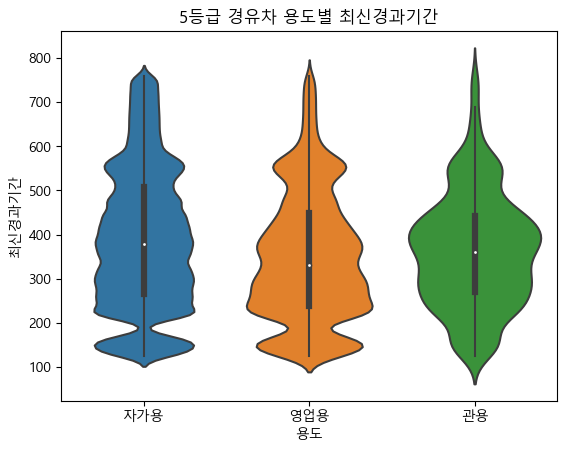

In [499]:
plt.title('5등급 경유차 용도별 최신경과기간')
sns.violinplot(data=export5, x='용도', y='최신경과기간');

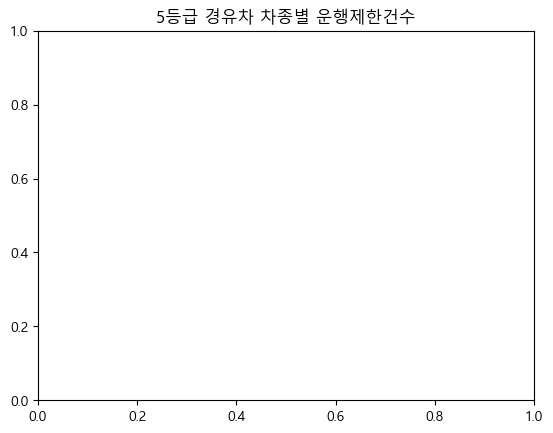

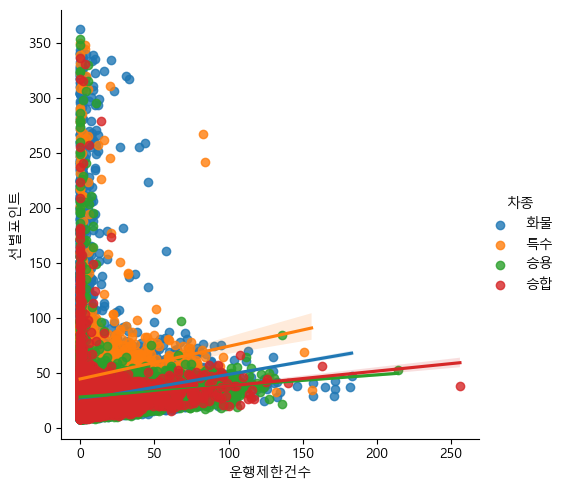

In [500]:
plt.title('5등급 경유차 차종별 운행제한건수')
sns.lmplot(data=export5, x='운행제한건수', y='선별포인트', hue='차종');

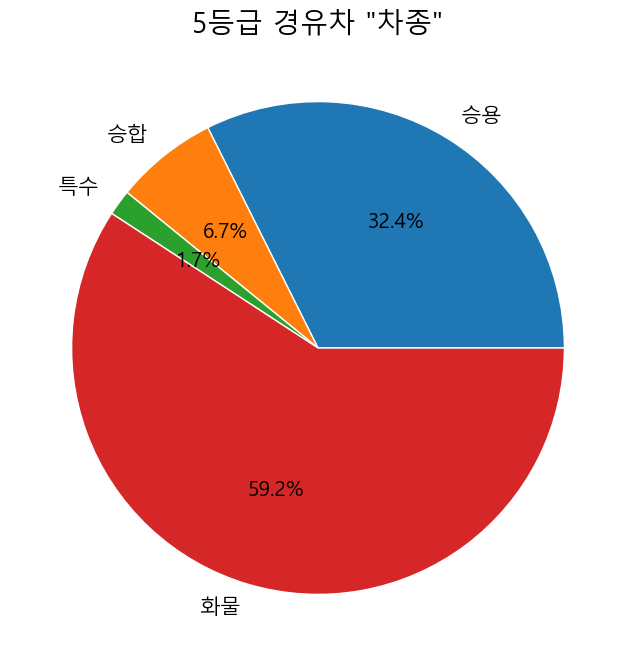

In [655]:
plt.figure(figsize=(8, 8))
plt.title('5등급 경유차 "차종"', fontdict={'fontsize':20}, zorder=10)
plt.pie(temp['차대번호'], labels=temp['차종'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});

In [656]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한단속정보', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량', '총중량'],
      dtype='object')

In [657]:
export5.loc[export5['차종'] == '승용', '무부하매연측정치1'].values

array([60.,  0.,  0., ...,  0.,  4.,  1.])

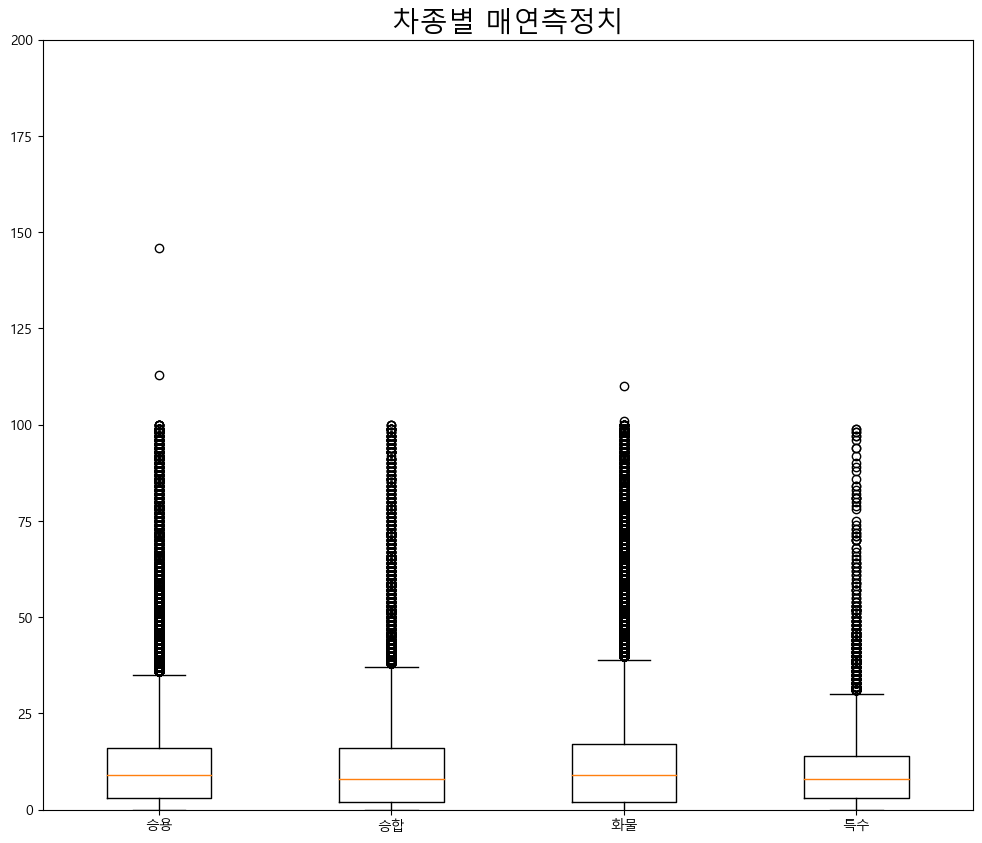

In [671]:
a1 = export5.loc[export5['차종'] == '승용', '무부하매연측정치1'].dropna()
a2 = export5.loc[export5['차종'] == '승합', '무부하매연측정치1'].dropna()
a3 = export5.loc[export5['차종'] == '화물', '무부하매연측정치1'].dropna()
a4 = export5.loc[export5['차종'] == '특수', '무부하매연측정치1'].dropna()
plt.figure(figsize=(12, 10))
plt.boxplot([a1, a2, a3, a4])
plt.ylim(0, 200)
plt.title('차종별 매연측정치', fontsize=20)
plt.xticks([1, 2, 3, 4], ['승용', '승합', '화물', '특수']);

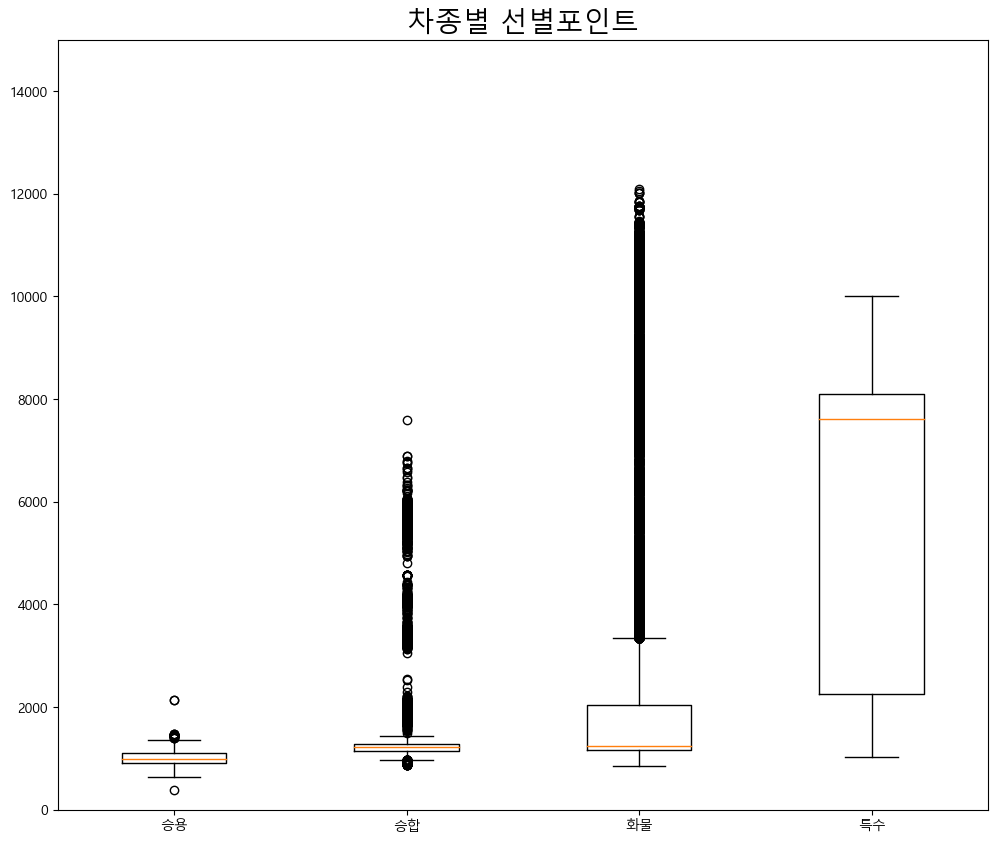

In [672]:
a1 = export5.loc[export5['차종'] == '승용', '선별포인트'].dropna()
a2 = export5.loc[export5['차종'] == '승합', '선별포인트'].dropna()
a3 = export5.loc[export5['차종'] == '화물', '선별포인트'].dropna()
a4 = export5.loc[export5['차종'] == '특수', '선별포인트'].dropna()
plt.figure(figsize=(12, 10))
plt.boxplot([a1, a2, a3, a4])
plt.title('차종별 선별포인트', fontsize=20)
plt.ylim(0, 15000)
plt.xticks([1, 2, 3, 4], ['승용', '승합', '화물', '특수']);

In [660]:
export5.columns

Index(['차대번호', '차량등록번호', '본거지법정동코드', '차량연식', '용도', '차종', '차종유형', '선별포인트',
       '무부하매연측정치1', '1일평균주행거리', '최신경과기간', '운행제한단속정보', '지원비용_조기폐차_백만원',
       '지원비용_DPF_백만원', '배기량', '총중량'],
      dtype='object')

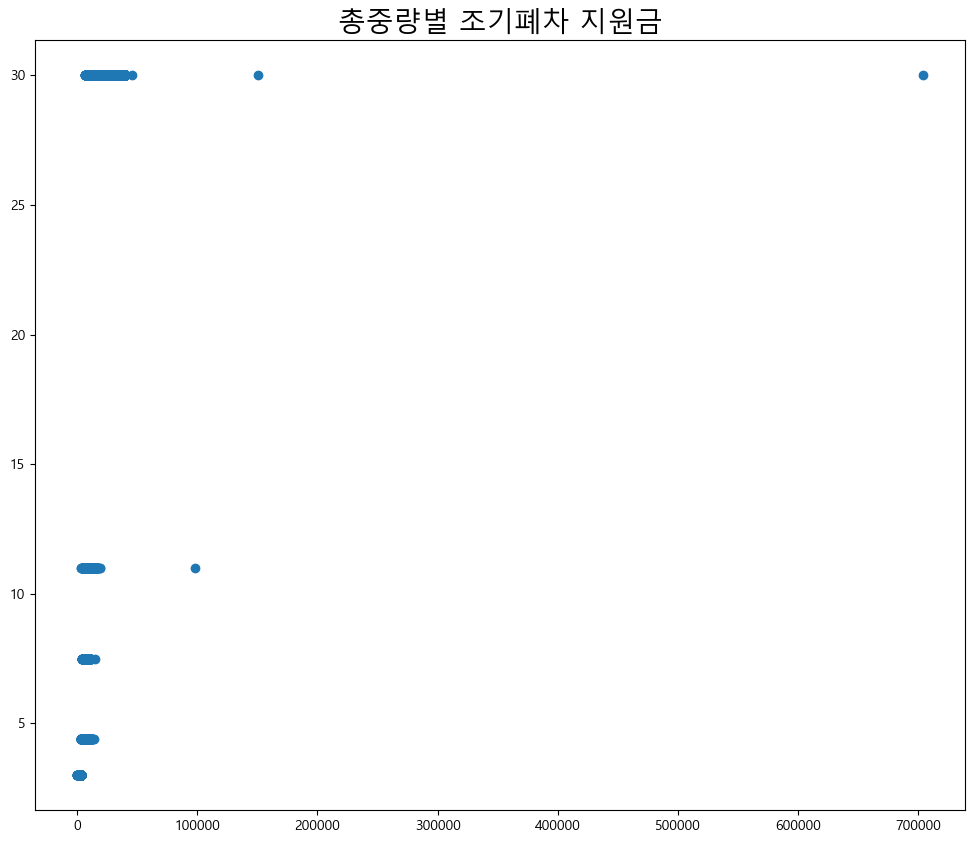

In [668]:
plt.figure(figsize=(12, 10))
plt.title('총중량별 조기폐차 지원금', fontsize=20)
plt.scatter(export5['총중량'], export5['지원비용_조기폐차_백만원']);

In [662]:
export5['용도'].unique()

array(['자가용', '영업용', '관용'], dtype=object)

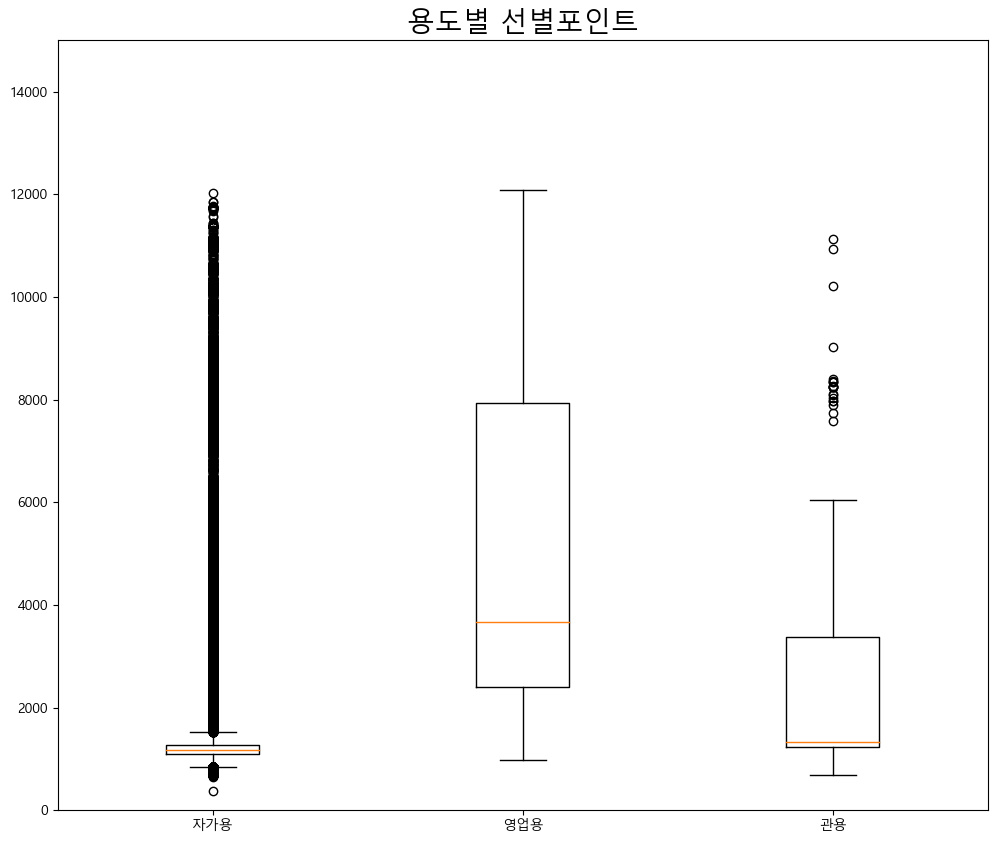

In [673]:
a1 = export5.loc[export5['용도'] == '자가용', '선별포인트'].dropna()
a2 = export5.loc[export5['용도'] == '영업용', '선별포인트'].dropna()
a3 = export5.loc[export5['용도'] == '관용', '선별포인트'].dropna()
plt.figure(figsize=(12, 10))
plt.boxplot([a1, a2, a3])
plt.title('용도별 선별포인트', fontsize=20)
plt.ylim(0, 15000)
plt.xticks([1, 2, 3], ['자가용', '영업용', '관용']);

(array([11217.]), array([731., 760.]), <BarContainer object of 1 artists>)

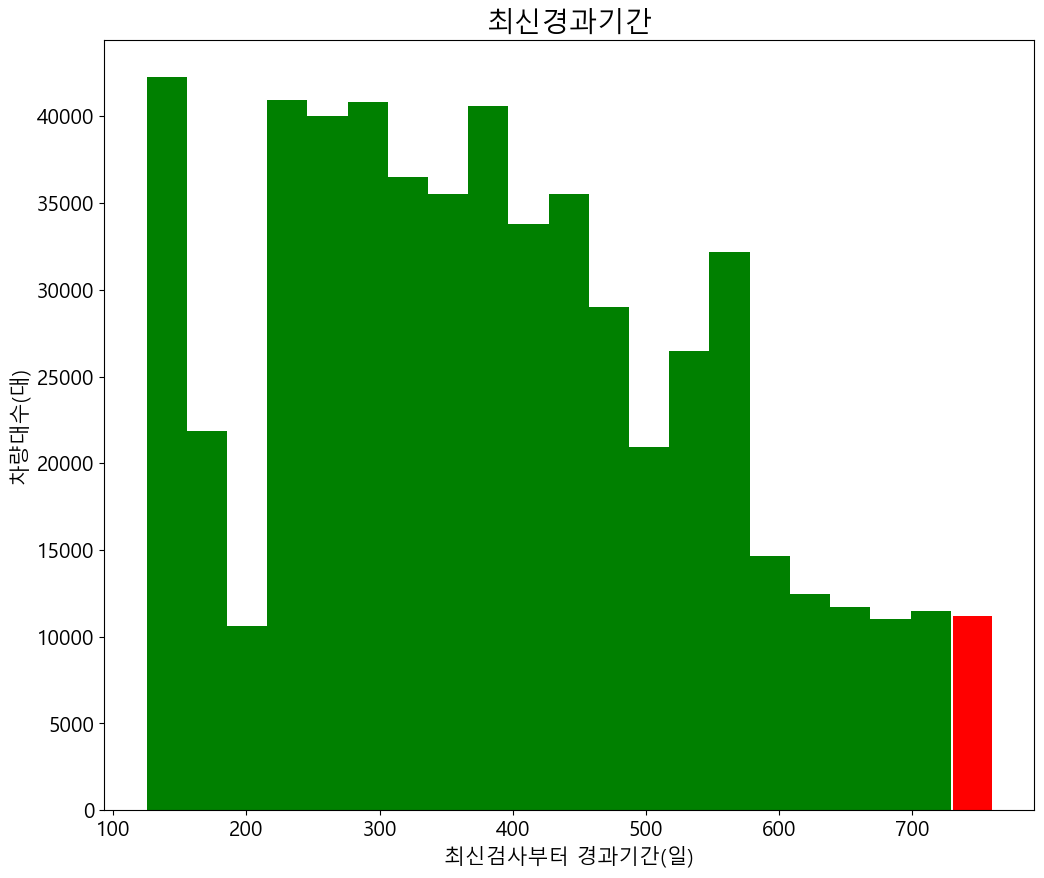

In [994]:
plt.figure(figsize=(12, 10))
plt.title('최신경과기간', fontsize=20)
plt.xlabel('최신검사부터 경과기간(일)', fontsize=15)
plt.ylabel('차량대수(대)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
y = export5['최신경과기간']
threshold = 730
below_threshold = y < threshold
plt.hist(y[below_threshold], bins=20, color='green')
above_threshold = np.logical_not(below_threshold)
plt.hist(y[above_threshold], bins=1, color='red')

# 검증

In [5]:
drive = 'D'
chk_fold = f'{drive}:/data/big2/BD3/raw/BD3-3_결과데이터'

## 4등급

In [70]:
name = 'BD3-3_4등급_경유_이상데이터_신A급'
file_name = f'{name}.csv'
dfa = pd.read_csv(os.path.join(chk_fold, file_name), low_memory=False, encoding='cp949')
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   차대번호       14 non-null     object 
 1   차량번호       14 non-null     object 
 2   제원관리번호     14 non-null     object 
 3   차종         14 non-null     object 
 4   용도         14 non-null     object 
 5   최초등록일      14 non-null     int64  
 6   연식         14 non-null     int64  
 7   제작일자       14 non-null     float64
 8   검사유효일      14 non-null     float64
 9   배출가스인증번호   13 non-null     object 
 10  등급         14 non-null     int64  
 11  차명         14 non-null     object 
 12  차종분류       14 non-null     object 
 13  차종유형       14 non-null     object 
 14  자동차형식      14 non-null     object 
 15  제작사명       14 non-null     object 
 16  연료         14 non-null     object 
 17  엔진형식       14 non-null     object 
 18  총중량        14 non-null     float64
 19  적재중량       14 non-null     float64
 20  엔진출력       1

In [71]:
dfa[((dfa['최근검사경과일'] > 1095) | (dfa['최근검사경과일'].isnull() == True)) & (dfa['운행제한건수'] >= 1)].shape

(14, 55)

In [72]:
dfa['우선차량선별기준'].describe()

count     14
unique     1
top        A
freq      14
Name: 우선차량선별기준, dtype: object

In [77]:
len(set(gm4d.loc[idx4a, '차대번호']) - set(dfa['차대번호']))

0

In [67]:
name = 'BD3-3_4등급_경유_이상데이터_신B급'
file_name = f'{name}.csv'
dfb = pd.read_csv(os.path.join(chk_fold, file_name), low_memory=False, encoding='cp949')
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95210 entries, 0 to 95209
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   차대번호       95210 non-null  object 
 1   차량번호       95210 non-null  object 
 2   제원관리번호     95210 non-null  object 
 3   차종         95210 non-null  object 
 4   용도         95210 non-null  object 
 5   최초등록일      95210 non-null  int64  
 6   연식         95210 non-null  int64  
 7   제작일자       95210 non-null  float64
 8   검사유효일      95207 non-null  float64
 9   배출가스인증번호   94594 non-null  object 
 10  등급         95210 non-null  int64  
 11  차명         95210 non-null  object 
 12  차종분류       95210 non-null  object 
 13  차종유형       95210 non-null  object 
 14  자동차형식      95210 non-null  object 
 15  제작사명       95210 non-null  object 
 16  연료         95210 non-null  object 
 17  엔진형식       95210 non-null  object 
 18  총중량        95210 non-null  float64
 19  적재중량       95208 non-null  float64
 20  엔진출력  

In [68]:
dfb[((dfb['최근검사경과일'] > 1095) | (dfb['최근검사경과일'].isnull() == True)) & (dfb['운행제한건수'] < 1)].shape

(95210, 55)

In [69]:
dfb['우선차량선별기준'].describe()

count     95210
unique        1
top           B
freq      95210
Name: 우선차량선별기준, dtype: object

In [78]:
len(set(gm4d.loc[idx4b, '차대번호']) - set(dfb['차대번호']))

0

In [73]:
name = 'BD3-3_4등급_경유_이상데이터_신C급'
file_name = f'{name}.csv'
dfc = pd.read_csv(os.path.join(chk_fold, file_name), low_memory=False, encoding='cp949')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054032 entries, 0 to 1054031
Data columns (total 55 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   차대번호       1054032 non-null  object 
 1   차량번호       1054032 non-null  object 
 2   제원관리번호     1054032 non-null  object 
 3   차종         1054032 non-null  object 
 4   용도         1054032 non-null  object 
 5   최초등록일      1054032 non-null  int64  
 6   연식         1054032 non-null  int64  
 7   제작일자       1054031 non-null  float64
 8   검사유효일      1054032 non-null  float64
 9   배출가스인증번호   1050098 non-null  object 
 10  등급         1054032 non-null  int64  
 11  차명         1054032 non-null  object 
 12  차종분류       1054032 non-null  object 
 13  차종유형       1054032 non-null  object 
 14  자동차형식      1054031 non-null  object 
 15  제작사명       1054015 non-null  object 
 16  연료         1054032 non-null  object 
 17  엔진형식       1054032 non-null  object 
 18  총중량        1054032 non-null  float64
 19  

In [74]:
dfc[dfc['최근검사경과일'] <= 1095].shape

(1054032, 55)

In [75]:
dfc['우선차량선별기준'].describe()

count     1054032
unique          1
top             C
freq      1054032
Name: 우선차량선별기준, dtype: object

In [79]:
len(set(gm4d.loc[idx4c, '차대번호']) - set(dfc['차대번호']))

0

## 5등급

In [80]:
name = 'BD3-3_5등급_경유_이상데이터_신A급'
file_name = f'{name}.csv'
dfa = pd.read_csv(os.path.join(chk_fold, file_name), low_memory=False, encoding='cp949')
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39823 entries, 0 to 39822
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   차량등록번호     39823 non-null  object 
 1   본거지법정동코드   39823 non-null  int64  
 2   차대번호       39823 non-null  object 
 3   제원관리번호     39823 non-null  object 
 4   배출가스인증번호   25223 non-null  object 
 5   배출가스등급     39823 non-null  int64  
 6   용도         39823 non-null  object 
 7   차명         39823 non-null  object 
 8   차종         39823 non-null  object 
 9   차종유형       39823 non-null  object 
 10  연료         39823 non-null  object 
 11  배기량        39823 non-null  float64
 12  총중량        39823 non-null  float64
 13  차량연식       39823 non-null  int64  
 14  저감장치       6246 non-null   object 
 15  장치일련번호     6344 non-null   object 
 16  저감효율       1 non-null      float64
 17  최초등록일자수정   22513 non-null  object 
 18  최근검사일자수정   22513 non-null  object 
 19  최근주행거리     22513 non-null  float64
 20  등록일기준검

In [81]:
dfa[((dfa['최근검사경과일'] > 1095) | (dfa['최근검사경과일'].isnull() == True)) & (dfa['운행제한건수'] >= 1)].shape

(39823, 41)

In [82]:
dfa['우선차량선별기준'].describe()

count     39823
unique        1
top           A
freq      39823
Name: 우선차량선별기준, dtype: object

In [83]:
len(set(gm5d.loc[idx5a, '차대번호']) - set(dfa['차대번호']))

0

In [84]:
name = 'BD3-3_5등급_경유_이상데이터_신B급'
file_name = f'{name}.csv'
dfb = pd.read_csv(os.path.join(chk_fold, file_name), low_memory=False, encoding='cp949')
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419895 entries, 0 to 419894
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차량등록번호     419895 non-null  object 
 1   본거지법정동코드   419895 non-null  int64  
 2   차대번호       419895 non-null  object 
 3   제원관리번호     419895 non-null  object 
 4   배출가스인증번호   119435 non-null  object 
 5   배출가스등급     419895 non-null  object 
 6   용도         419895 non-null  object 
 7   차명         419895 non-null  object 
 8   차종         419895 non-null  object 
 9   차종유형       419895 non-null  object 
 10  연료         419895 non-null  object 
 11  배기량        419894 non-null  float64
 12  총중량        419895 non-null  float64
 13  차량연식       419895 non-null  int64  
 14  저감장치       47446 non-null   object 
 15  장치일련번호     57670 non-null   object 
 16  저감효율       44 non-null      float64
 17  최초등록일자수정   128900 non-null  object 
 18  최근검사일자수정   128900 non-null  object 
 19  최근주행거리     128900 non-n

In [85]:
dfb[((dfb['최근검사경과일'] > 1095) | (dfb['최근검사경과일'].isnull() == True)) & (dfb['운행제한건수'] < 1)].shape

(419895, 41)

In [86]:
dfb['우선차량선별기준'].describe()

count     419895
unique         1
top            B
freq      419895
Name: 우선차량선별기준, dtype: object

In [87]:
len(set(gm5d.loc[idx5b, '차대번호']) - set(dfb['차대번호']))

0

In [88]:
name = 'BD3-3_5등급_경유_이상데이터_신C급'
file_name = f'{name}.csv'
dfc = pd.read_csv(os.path.join(chk_fold, file_name), low_memory=False, encoding='cp949')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666281 entries, 0 to 666280
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차량등록번호     666281 non-null  object 
 1   본거지법정동코드   666281 non-null  int64  
 2   차대번호       666281 non-null  object 
 3   제원관리번호     666281 non-null  object 
 4   배출가스인증번호   399613 non-null  object 
 5   배출가스등급     666281 non-null  object 
 6   용도         666281 non-null  object 
 7   차명         666281 non-null  object 
 8   차종         666281 non-null  object 
 9   차종유형       666281 non-null  object 
 10  연료         666281 non-null  object 
 11  배기량        666281 non-null  float64
 12  총중량        666281 non-null  float64
 13  차량연식       666281 non-null  int64  
 14  저감장치       90842 non-null   object 
 15  장치일련번호     126791 non-null  object 
 16  저감효율       356 non-null     float64
 17  최초등록일자수정   666281 non-null  object 
 18  최근검사일자수정   666281 non-null  object 
 19  최근주행거리     666281 non-n

In [89]:
dfc[dfc['최근검사경과일'] <= 1095].shape

(666281, 41)

In [90]:
dfc['우선차량선별기준'].describe()

count     666281
unique         1
top            C
freq      666281
Name: 우선차량선별기준, dtype: object

In [95]:
len(dfc['차대번호'].unique())

664924

In [92]:
len(set(gm5d.loc[idx5c, '차대번호']) - set(dfc['차대번호']))

0

In [93]:
len(set(gm5d.loc[idx5c, '차대번호']) & set(dfc['차대번호']))

664924

# code end